In [1]:
import pandas as pd
df= pd.read_csv("BankChurners.csv")
df.head()
# Setting a global SEED value
SEED=42


In [2]:
import numpy as np
df=pd.read_csv("BankChurners.csv")
print(df.info())
print(df.describe(include='all'))

print(df.isnull().sum())
original_df=df.copy()

#Dropping irrelevant columns
df_for_modeling=df.drop(columns=['CLIENTNUM']+['Attrition_Flag']+[col for col in df.columns if col.startswith('Naive_Bayes')], inplace=True)

#Ordinal Encoding
edu_map={
    'Unknown': 0, 'Uneducated':1, 'High School': 2, 'College': 3, 'Graduate': 4,
    'Post-Graduate': 5, 'Doctorate': 6}
income_map = {
    'Unknown': -1,
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}
card_map = {
    'Blue': 1,
    'Silver': 2,
    'Gold': 3,
    'Platinum': 4
}
df['Education_Level_Num'] = df['Education_Level'].map(edu_map)
df['Income_Category_Num'] = df['Income_Category'].map(income_map)
df['Card_Category_Num'] = df['Card_Category'].map(card_map)

#One hot encoding for nominal categorical columns
df=pd.get_dummies(df, columns=['Gender', 'Marital_Status'], drop_first=False)
#Drop duplicates
df.drop_duplicates(inplace=True)

df.reset_index(drop=True, inplace=True)

df.to_csv("CC_CustomerSeg_Model1.csv", index=False)
df.to_excel("CC_CustomerSeg_Model1.xlsx", index=False)
print(df.info())
print(df.head())

               


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [3]:
df.head()

,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Utilization_Ratio,Education_Level_Num,Income_Category_Num,Card_Category_Num,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,High School,$60K - $80K,Blue,39,5,1,3,12691.0,...,0.061,2,2,1,False,True,False,True,False,False
1,49,5,Graduate,Less than $40K,Blue,44,6,1,2,8256.0,...,0.105,4,0,1,True,False,False,False,True,False
2,51,3,Graduate,$80K - $120K,Blue,36,4,1,0,3418.0,...,0.000,4,3,1,False,True,False,True,False,False
3,40,4,High School,Less than $40K,Blue,34,3,4,1,3313.0,...,0.760,2,0,1,True,False,False,False,False,True
4,40,3,Uneducated,$60K - $80K,Blue,21,5,1,0,4716.0,...,0.000,1,2,1,False,True,False,True,False,False


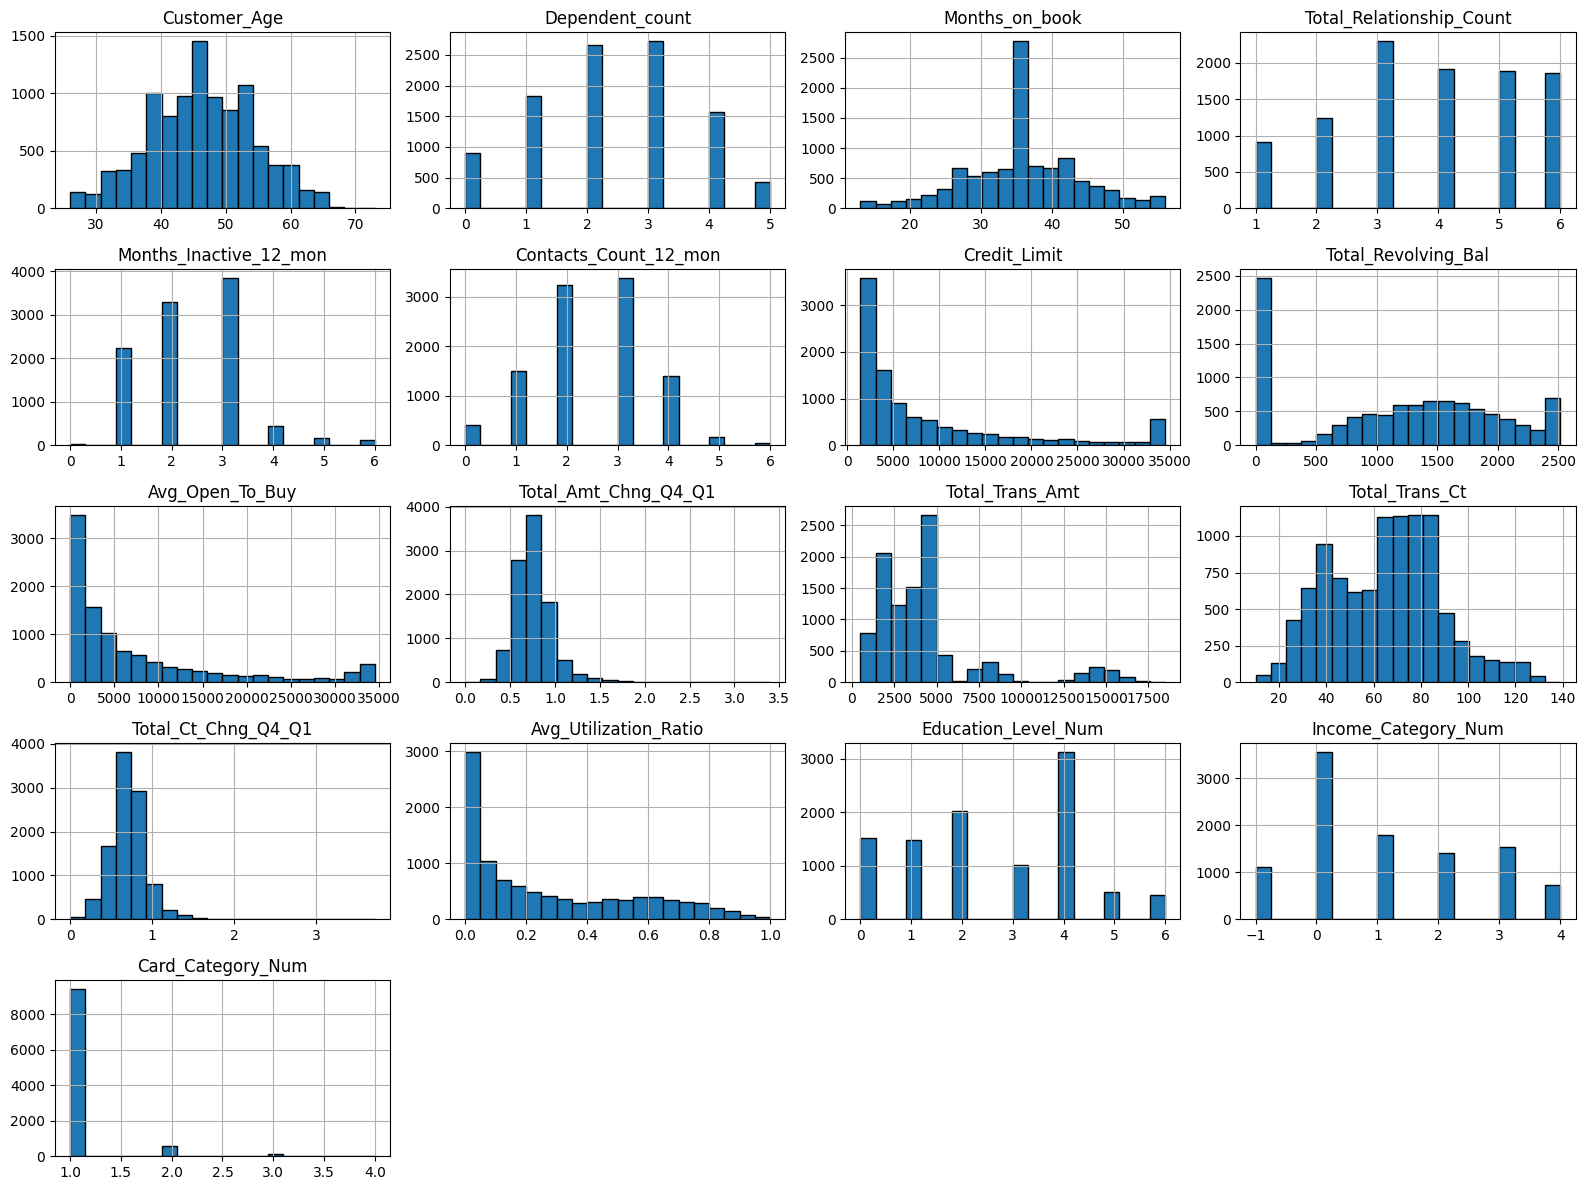

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df.hist(figsize=(16, 12), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

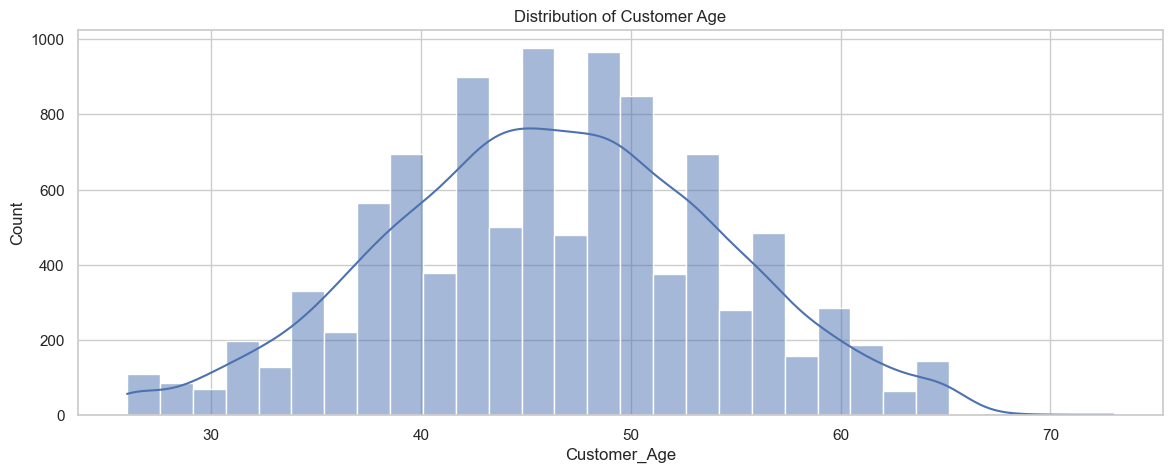

In [5]:
# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(14, 5))
sns.histplot(df['Customer_Age'], kde=True, bins=30)
plt.title("Distribution of Customer Age")
plt.show()


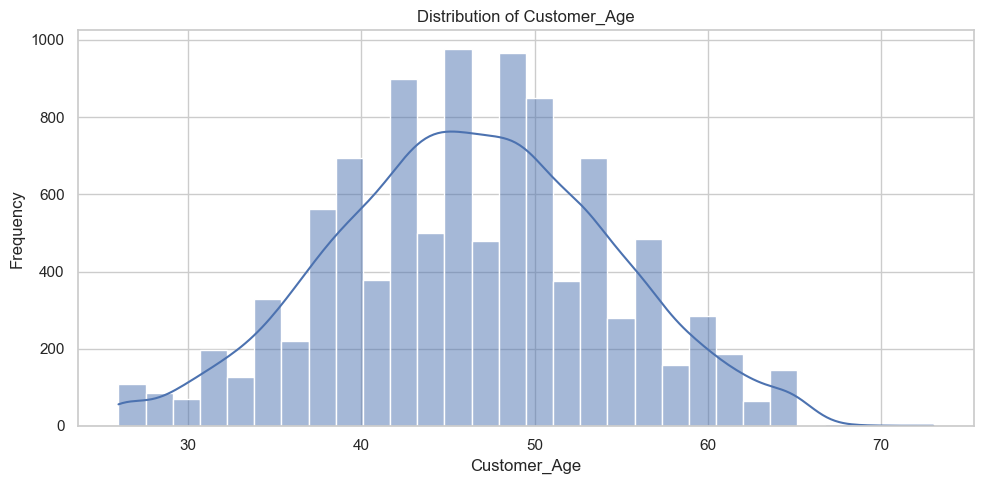

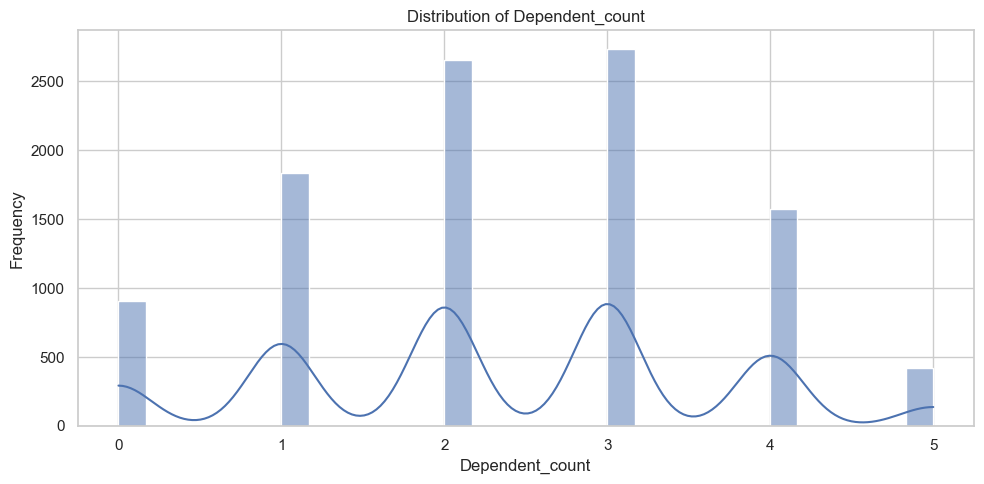

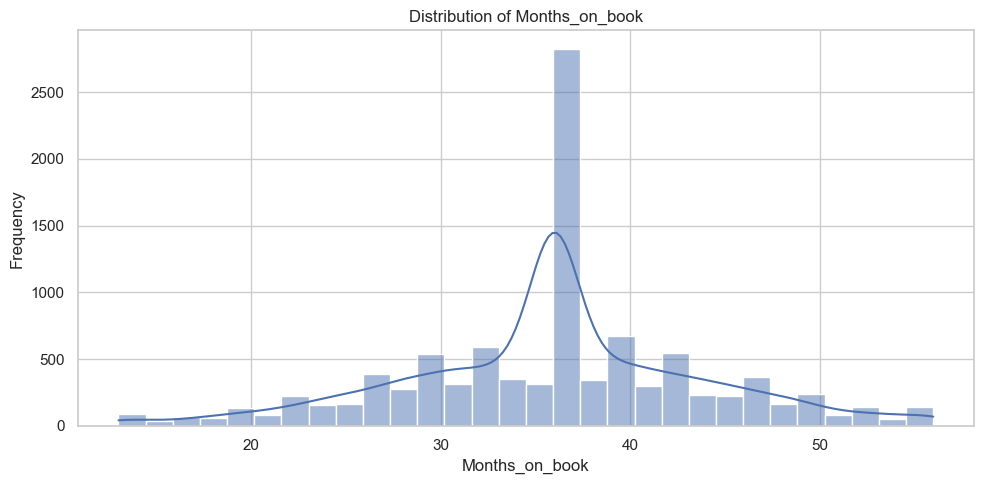

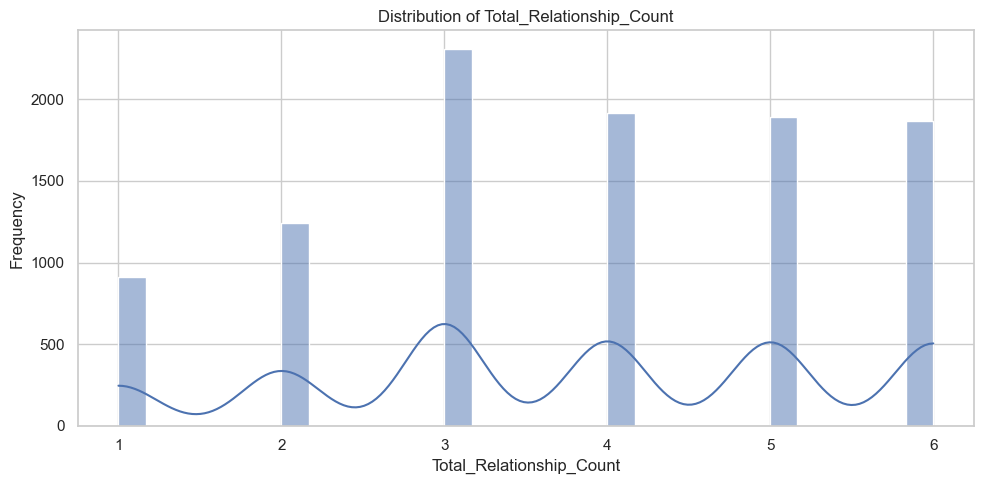

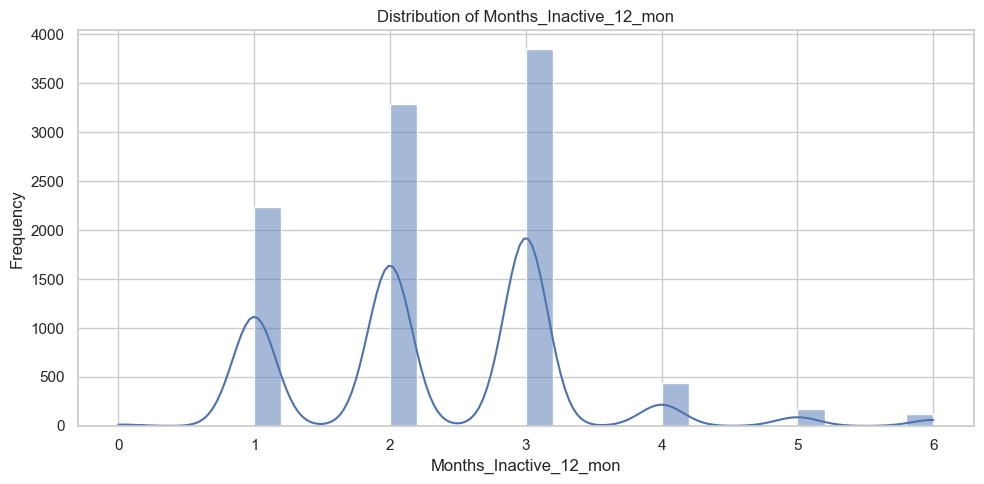

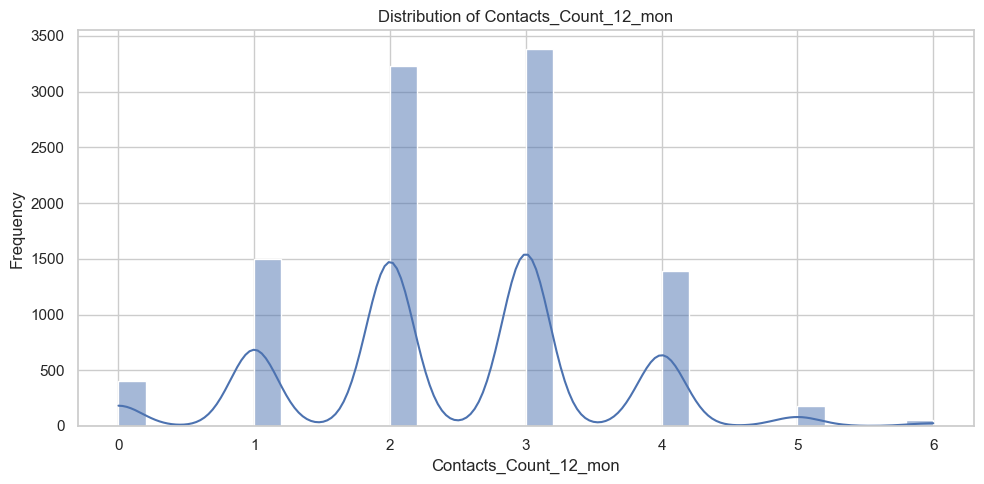

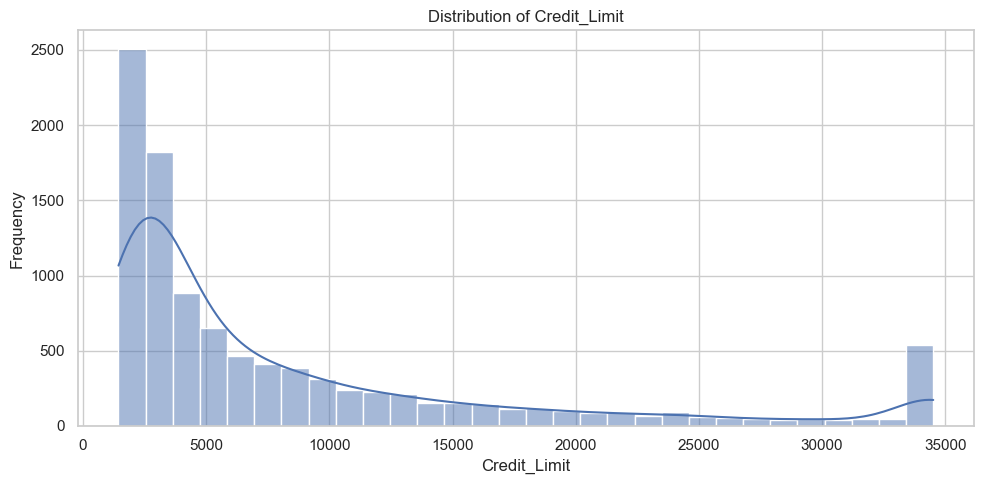

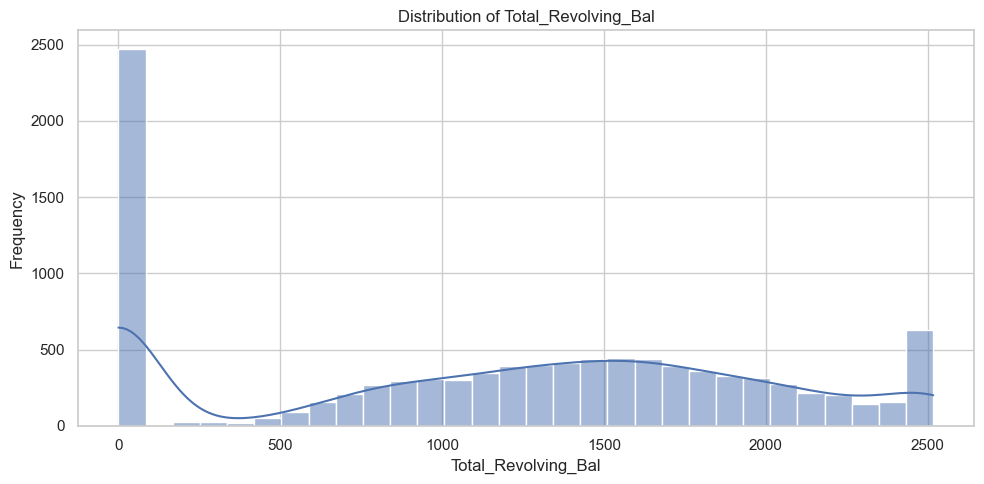

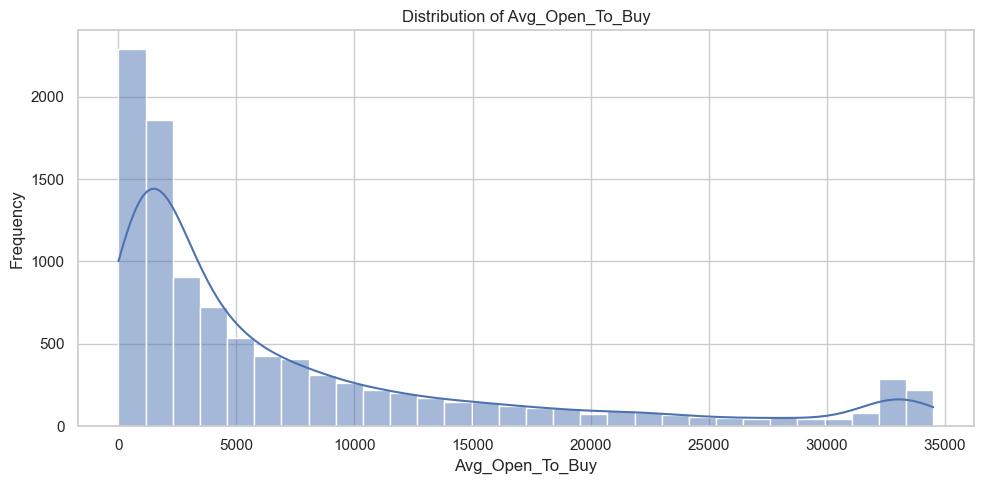

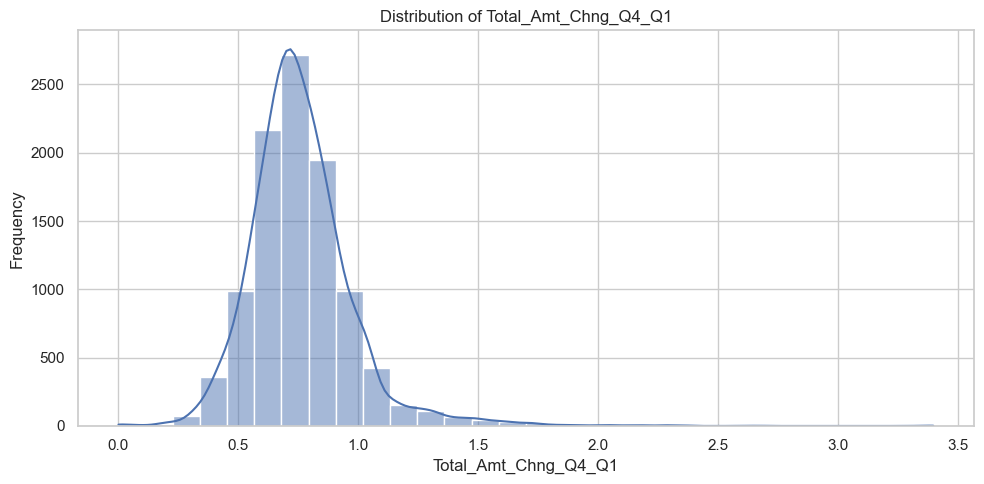

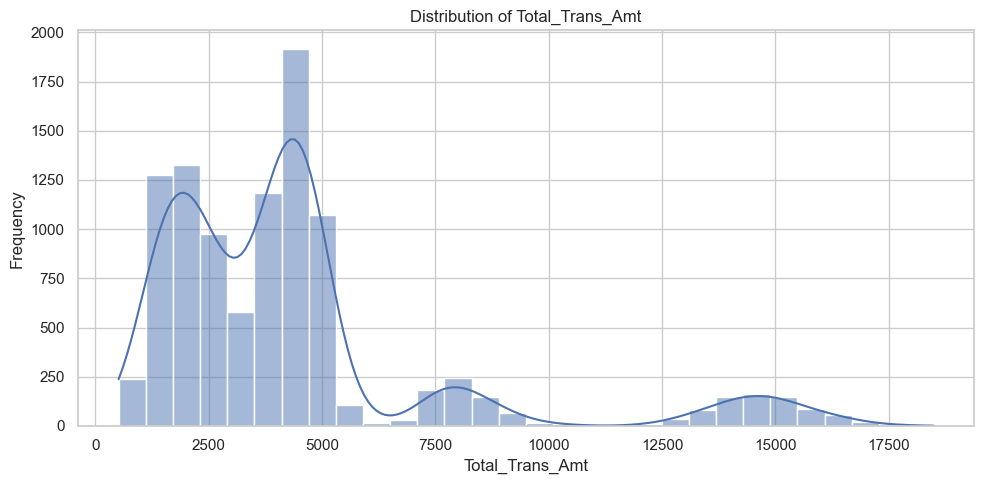

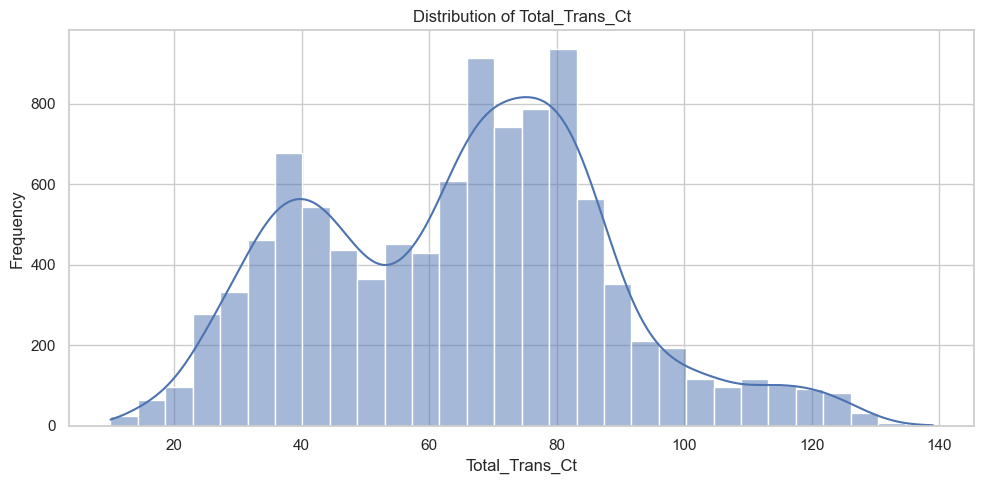

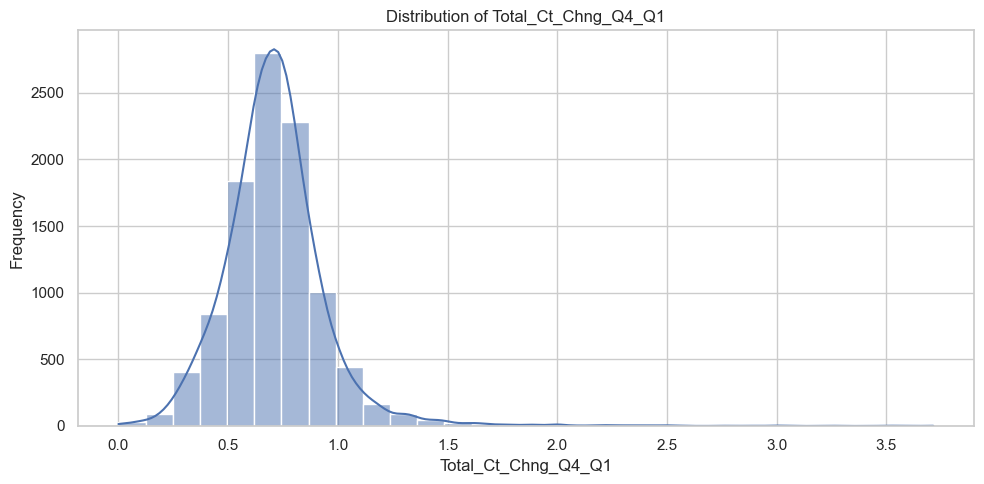

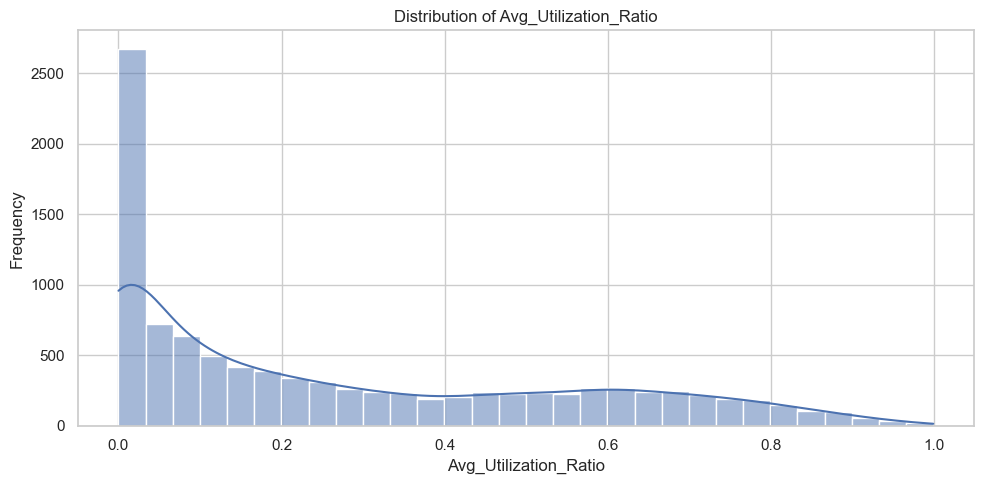

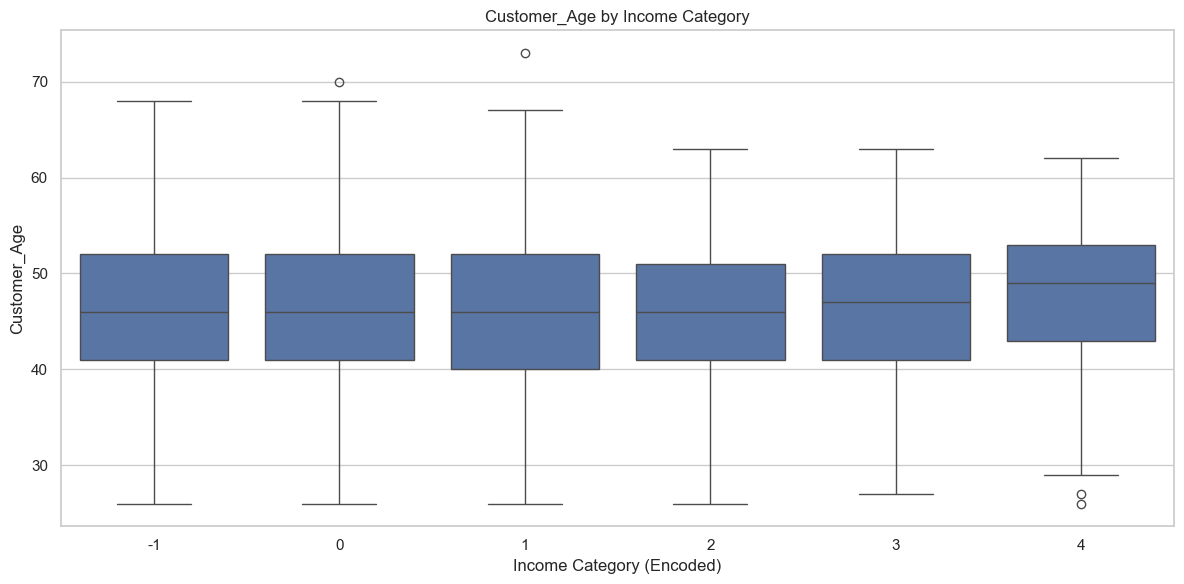

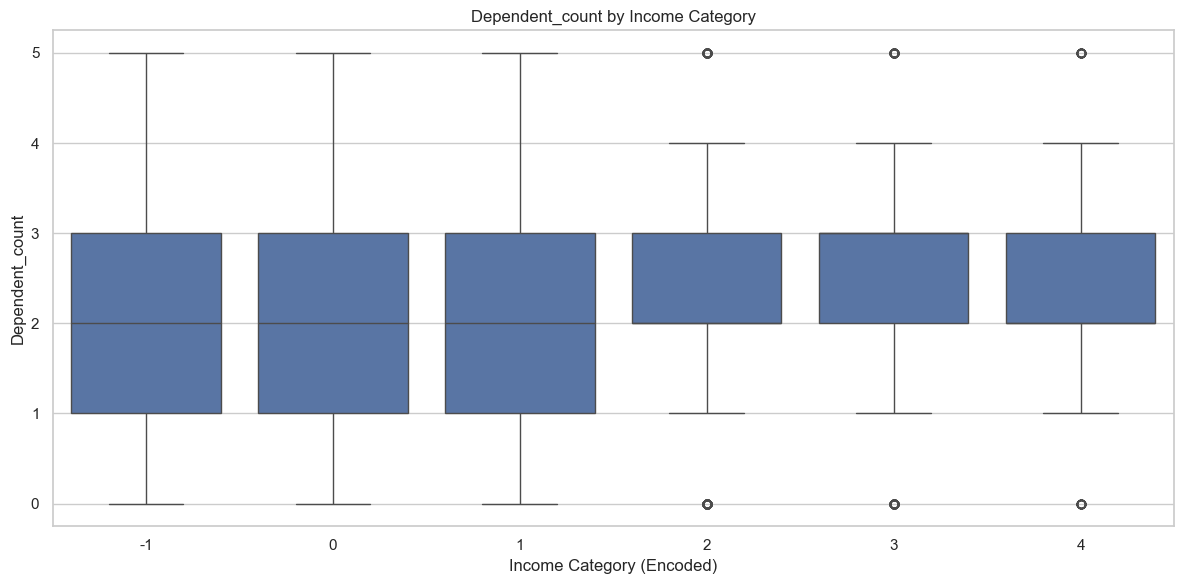

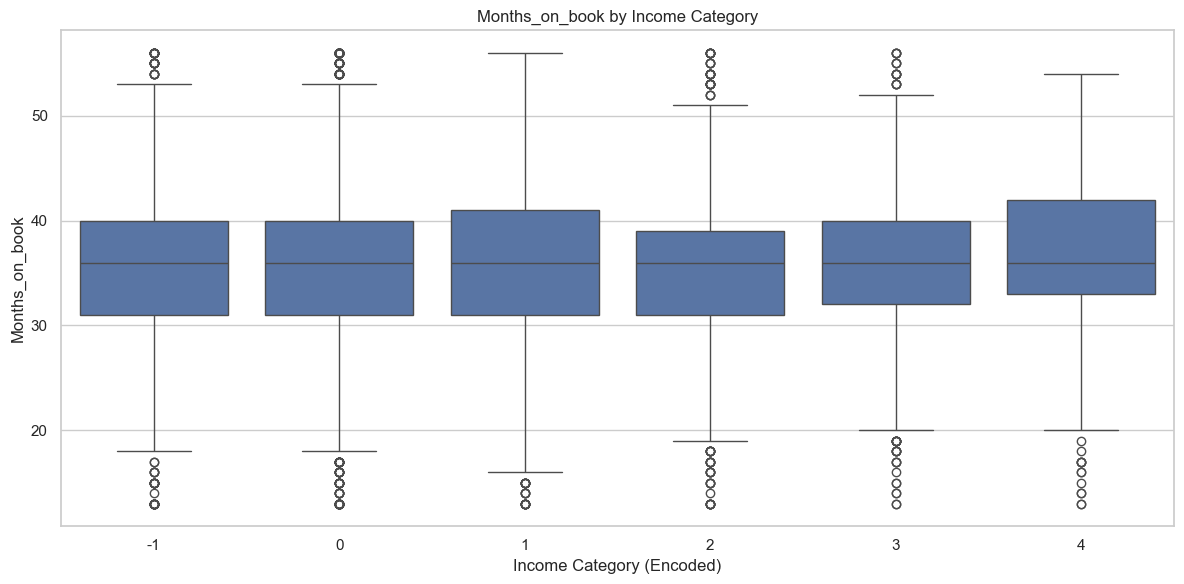

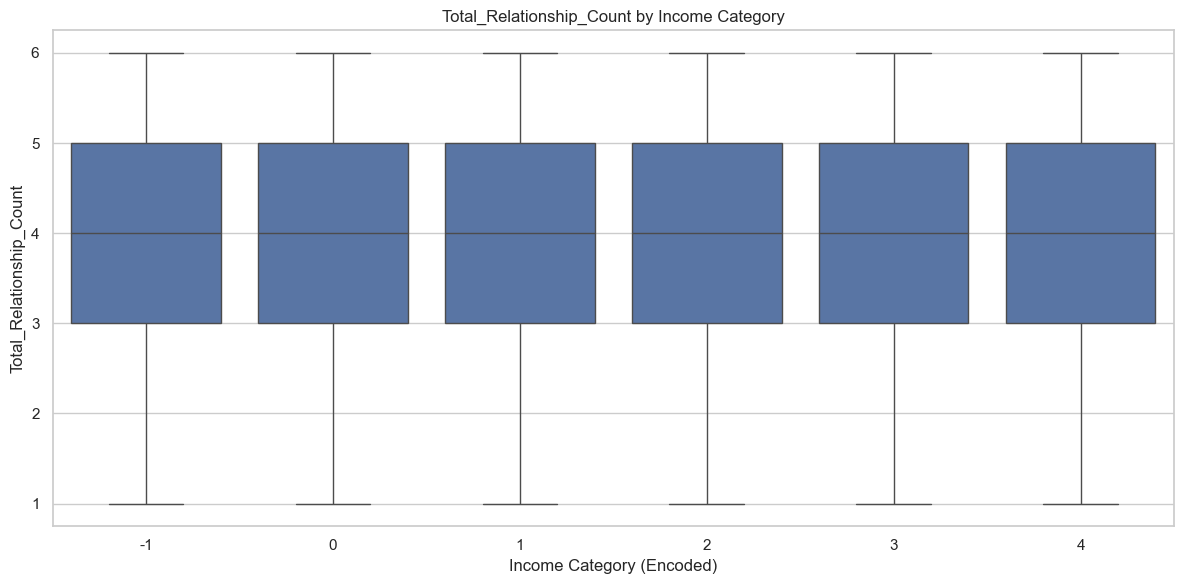

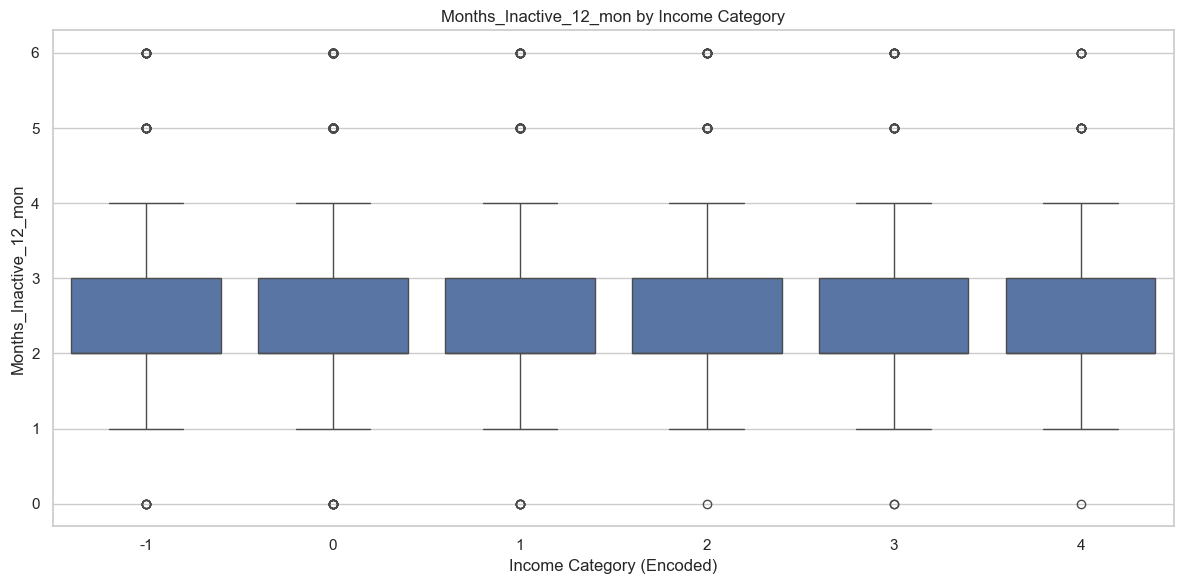

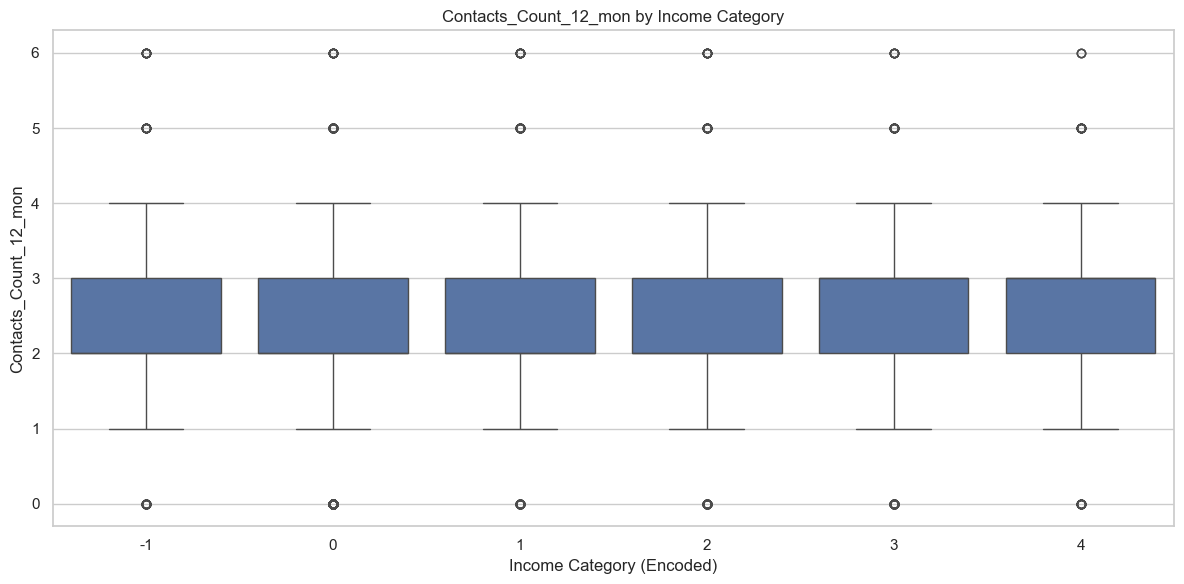

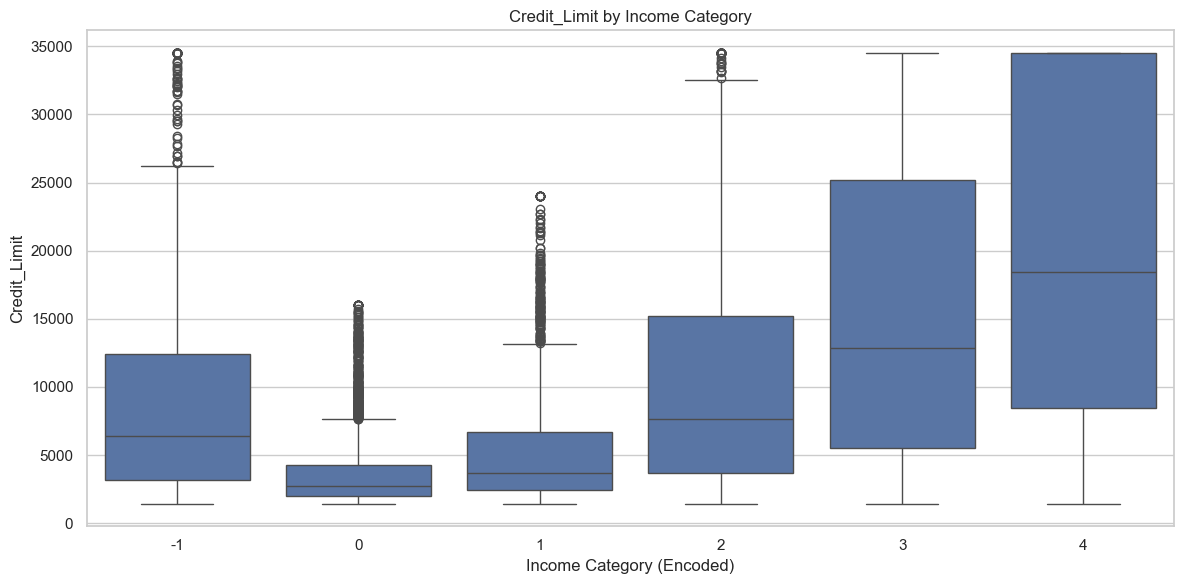

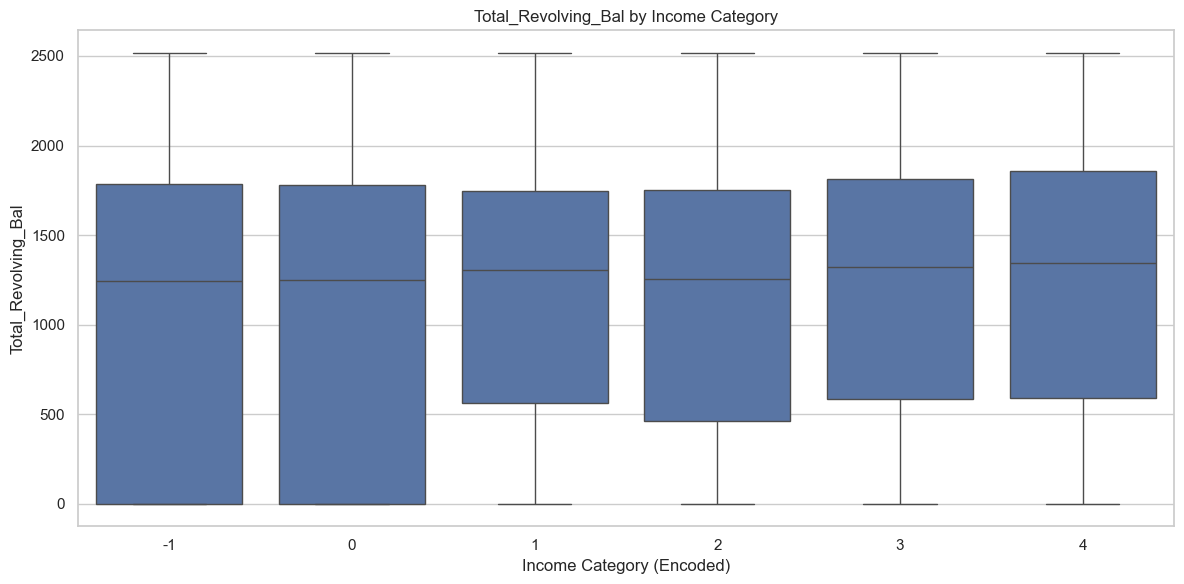

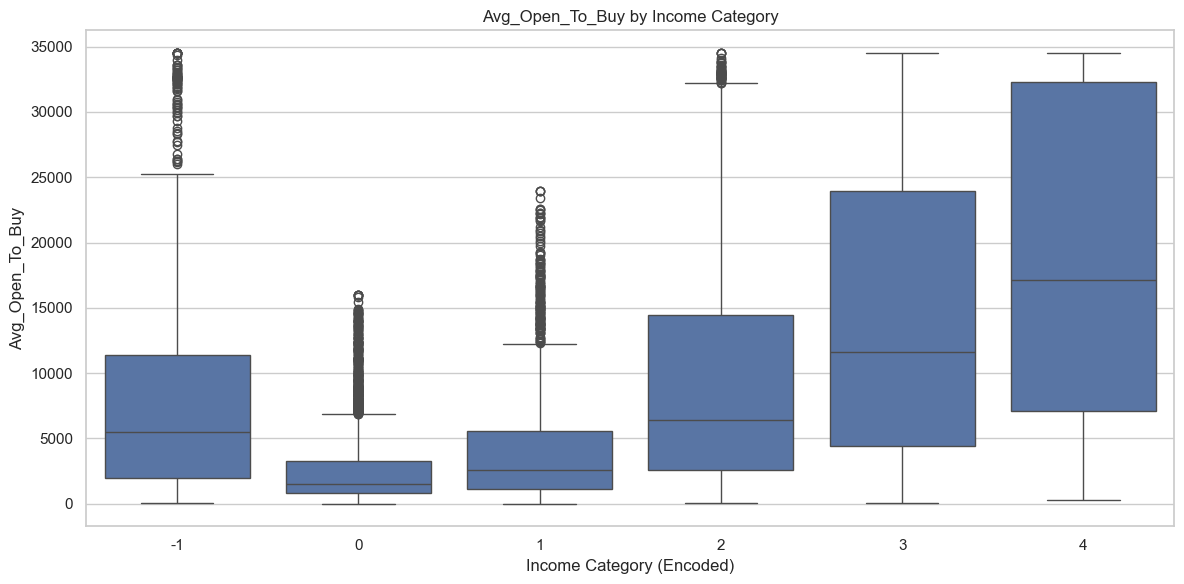

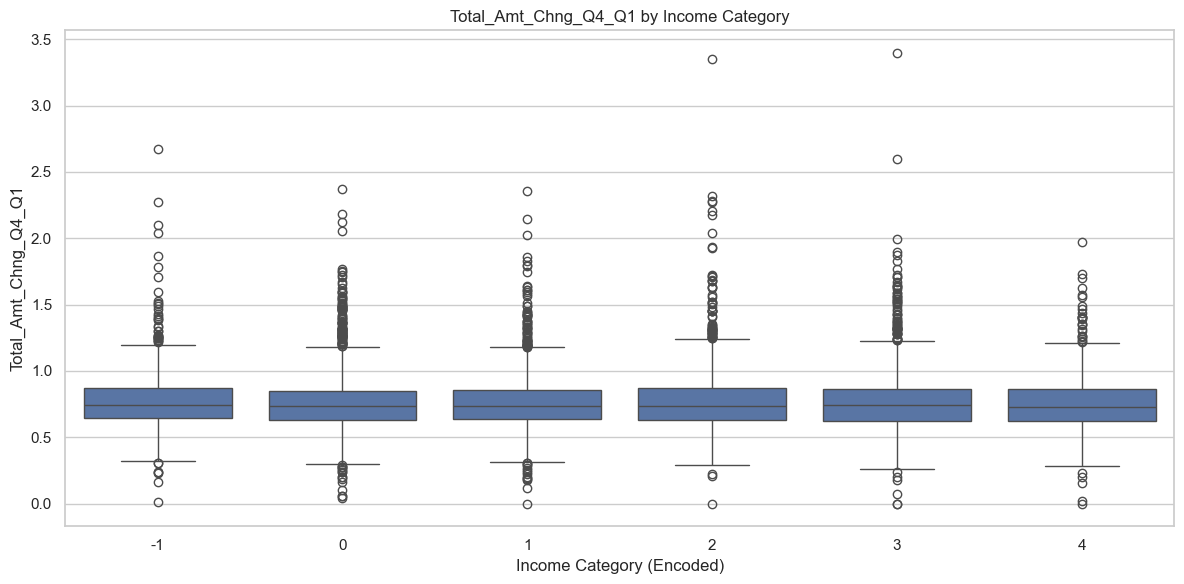

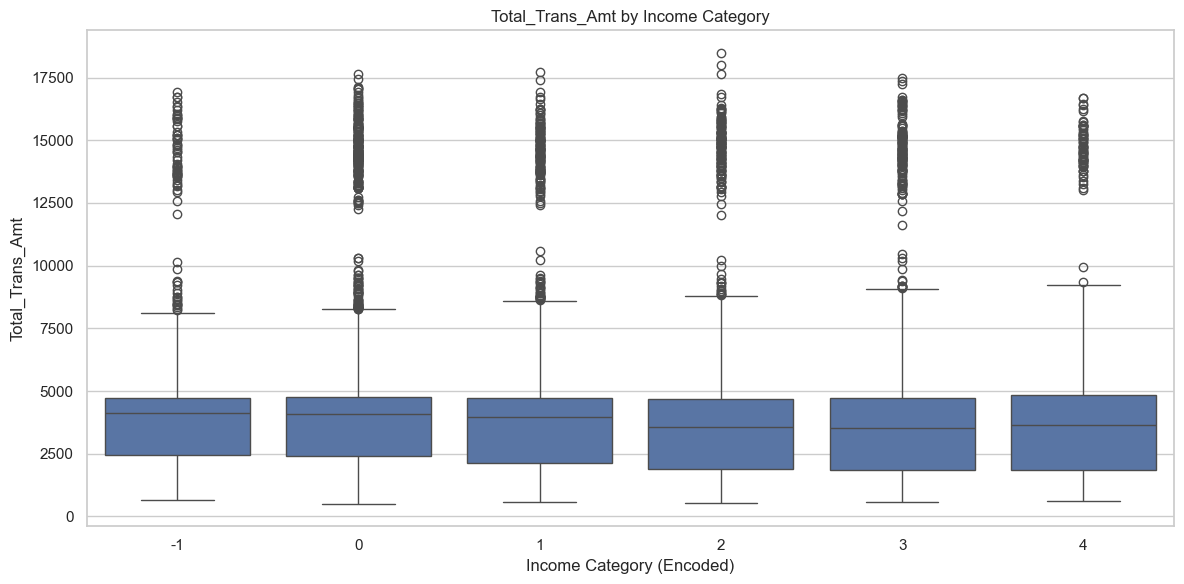

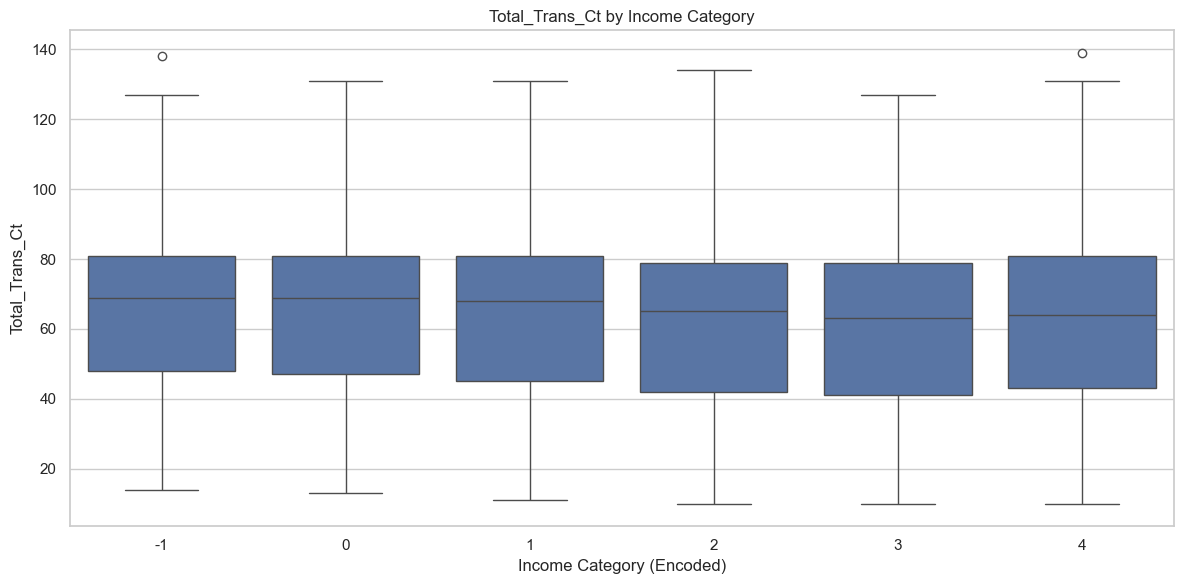

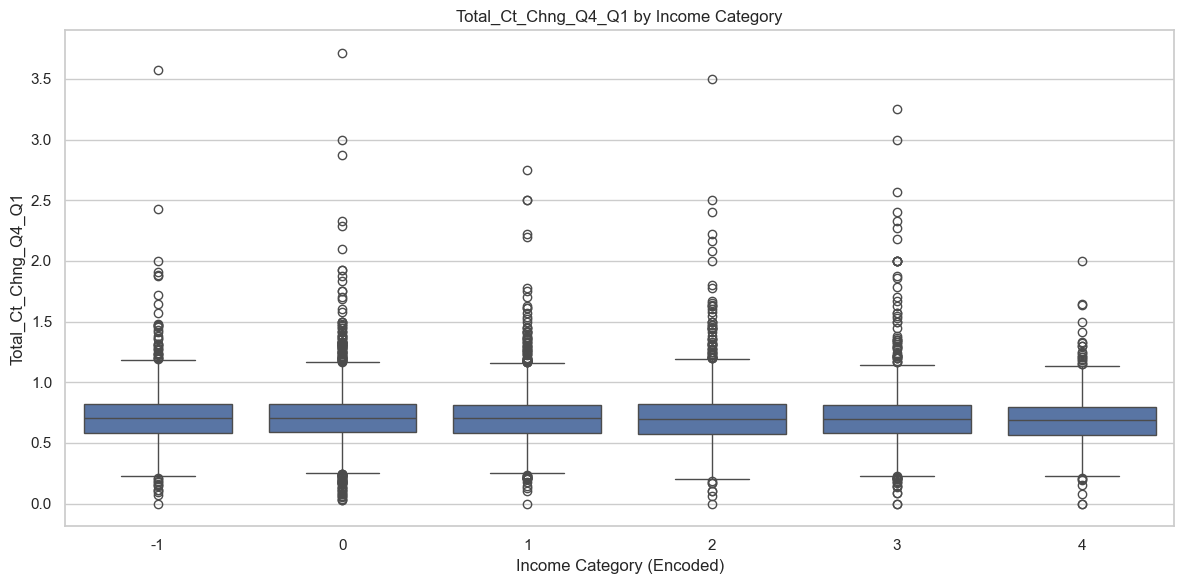

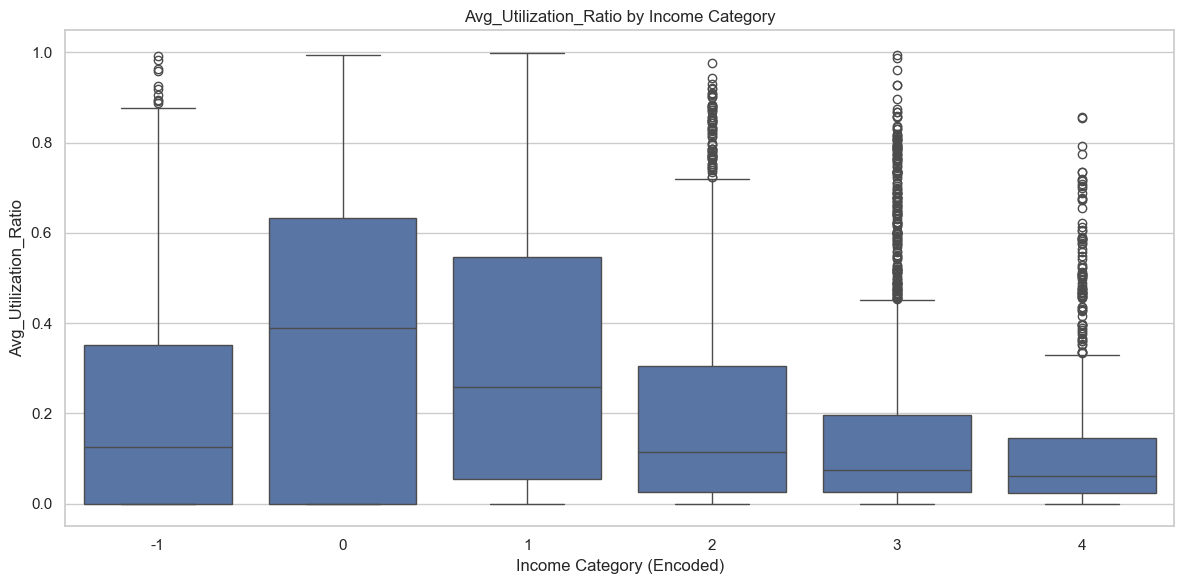

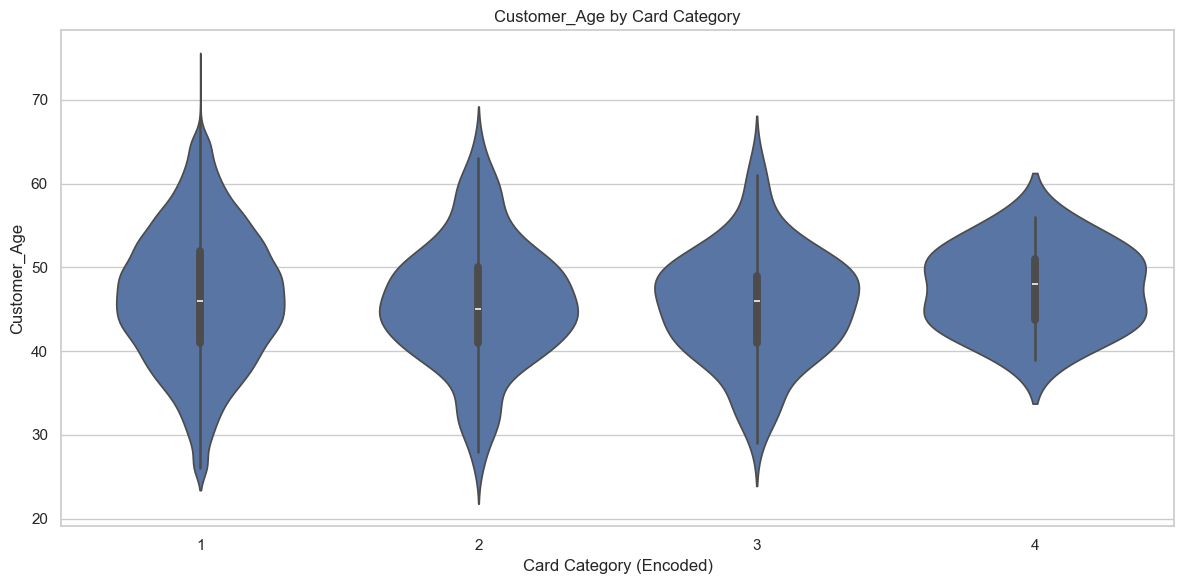

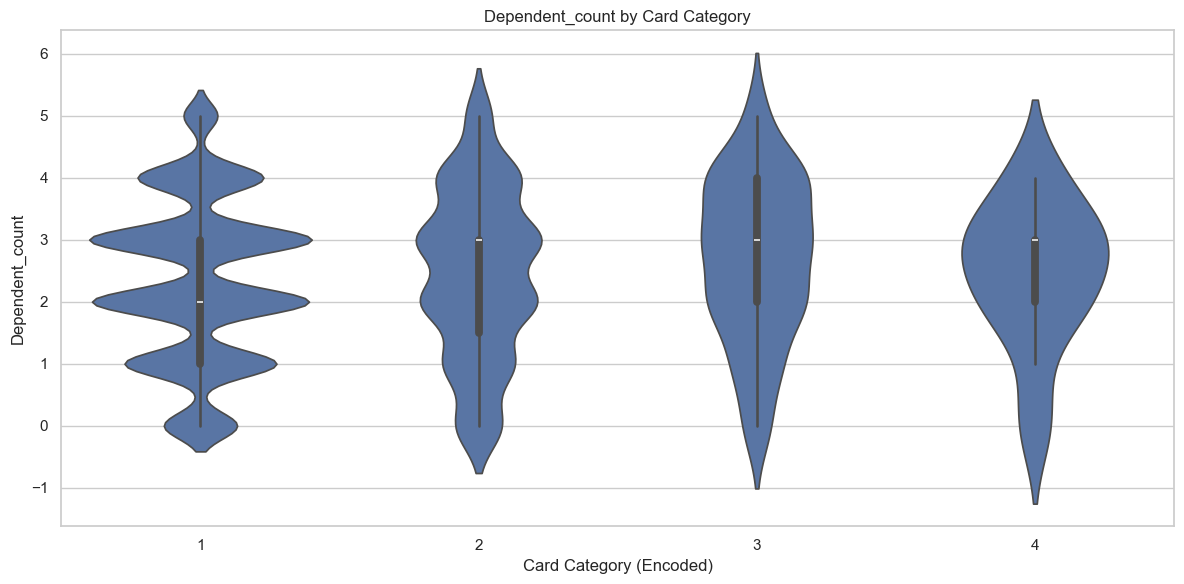

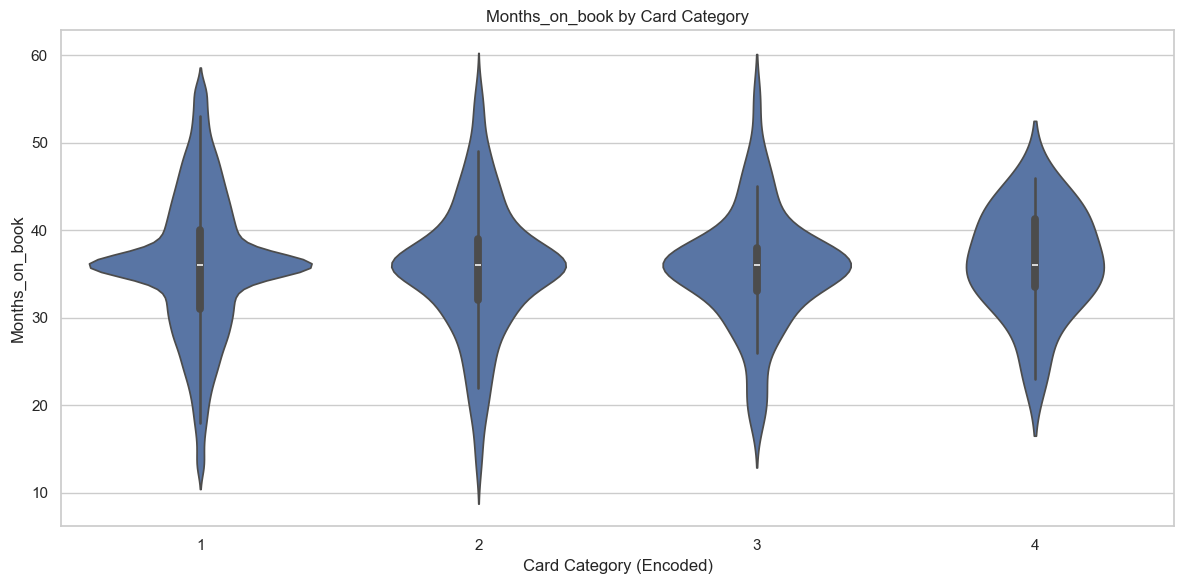

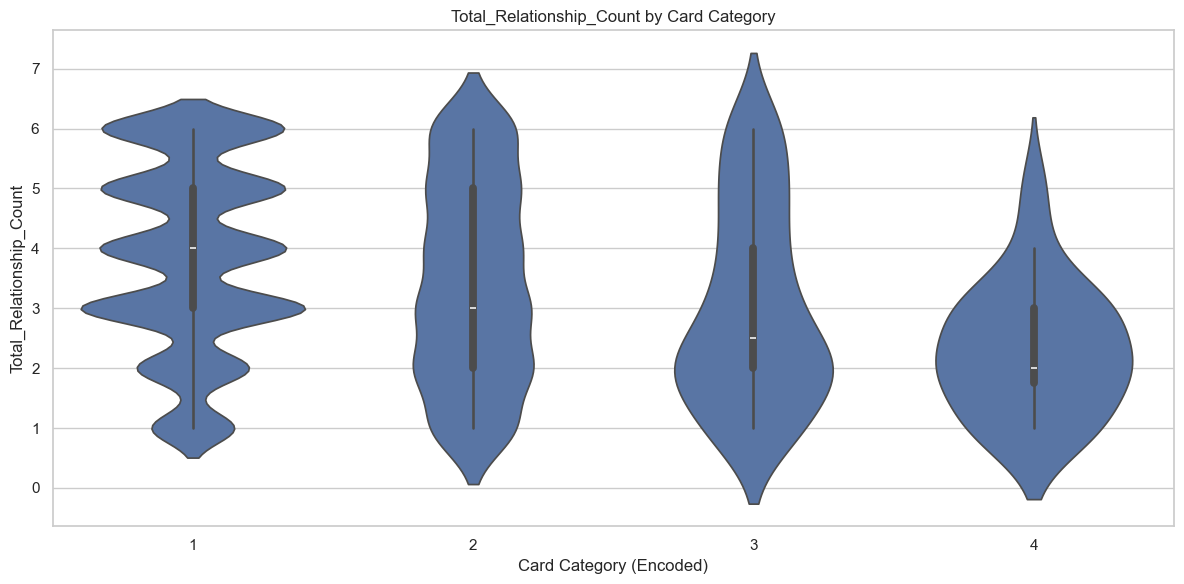

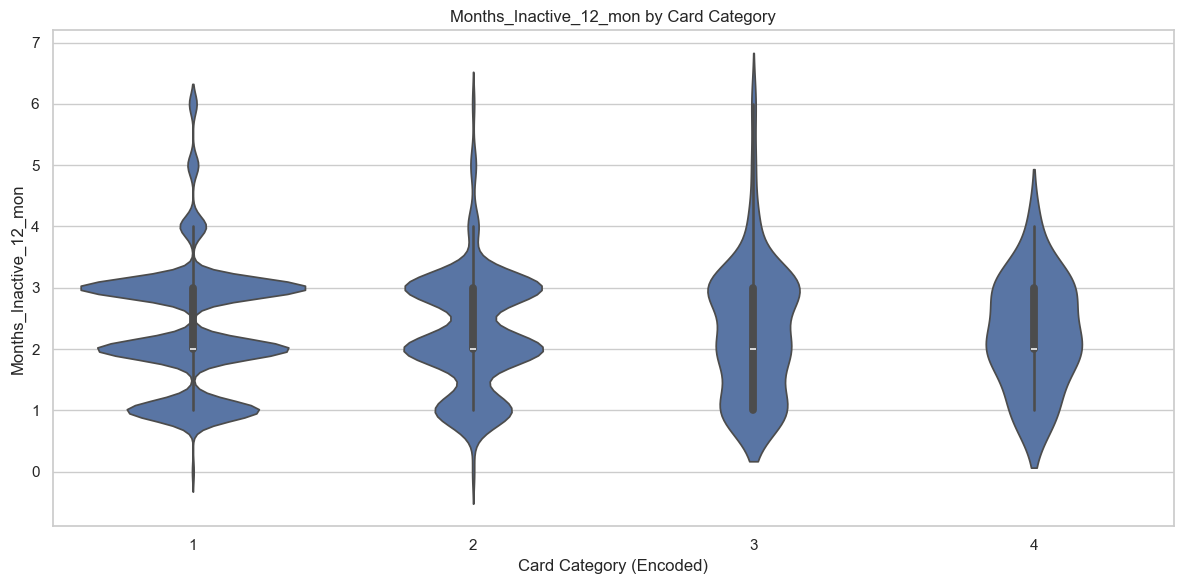

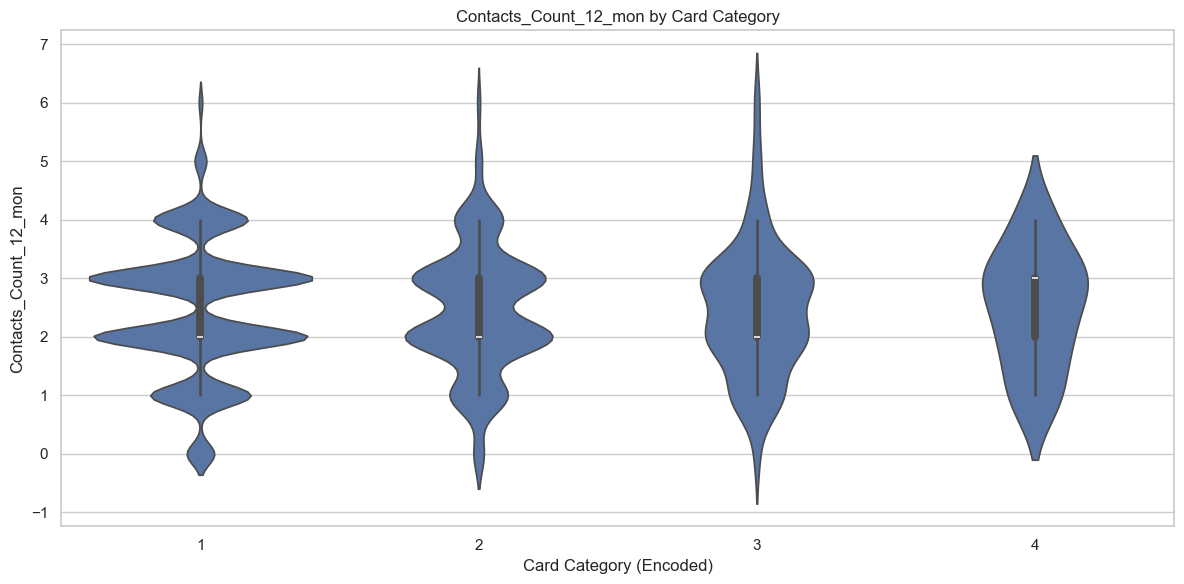

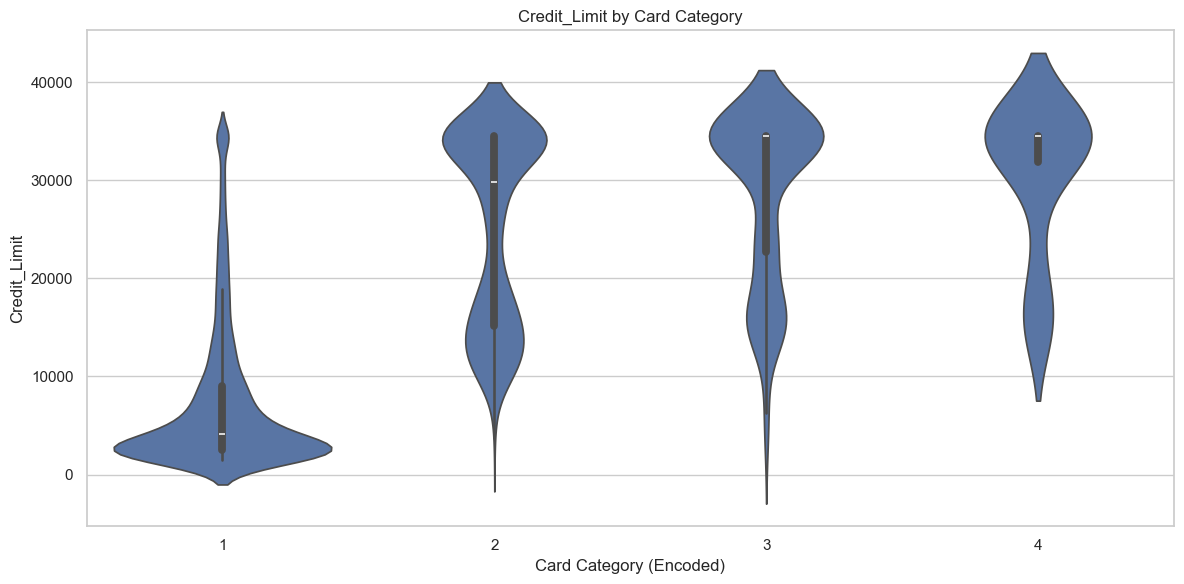

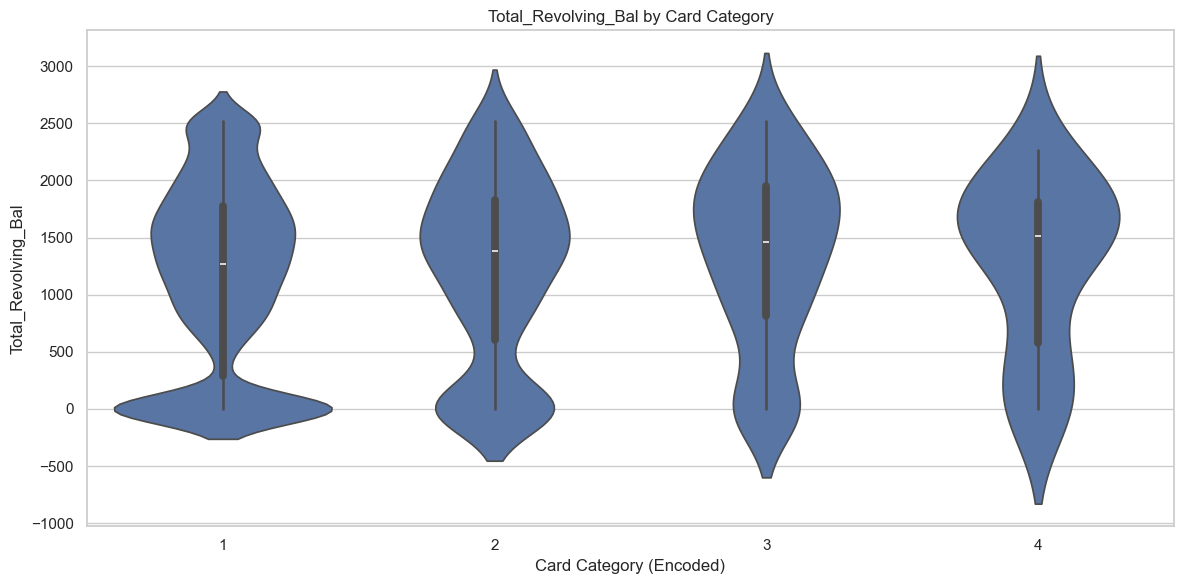

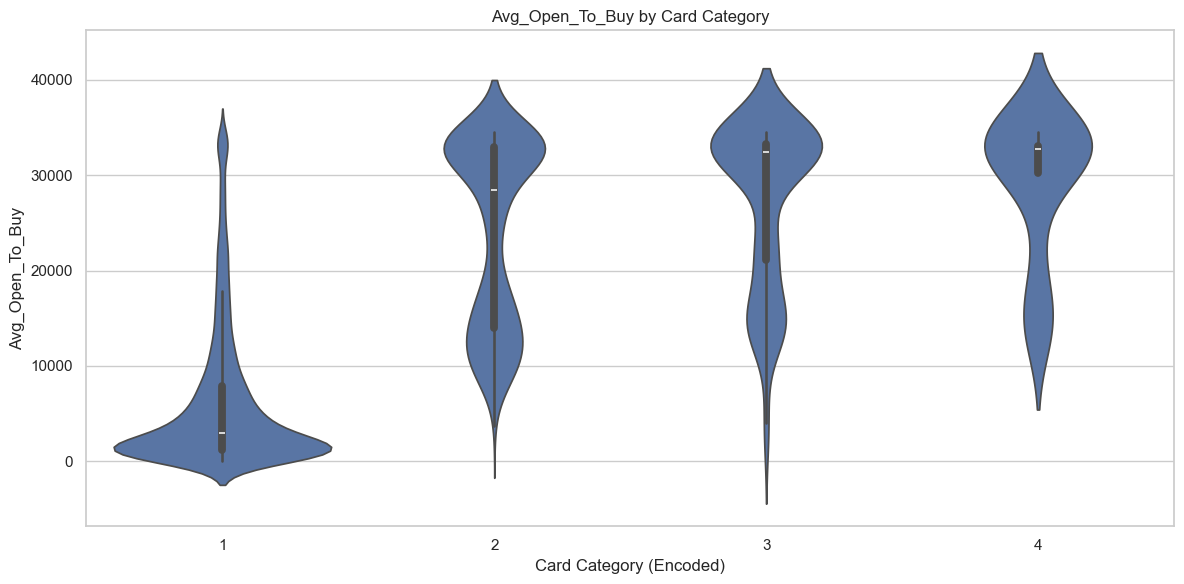

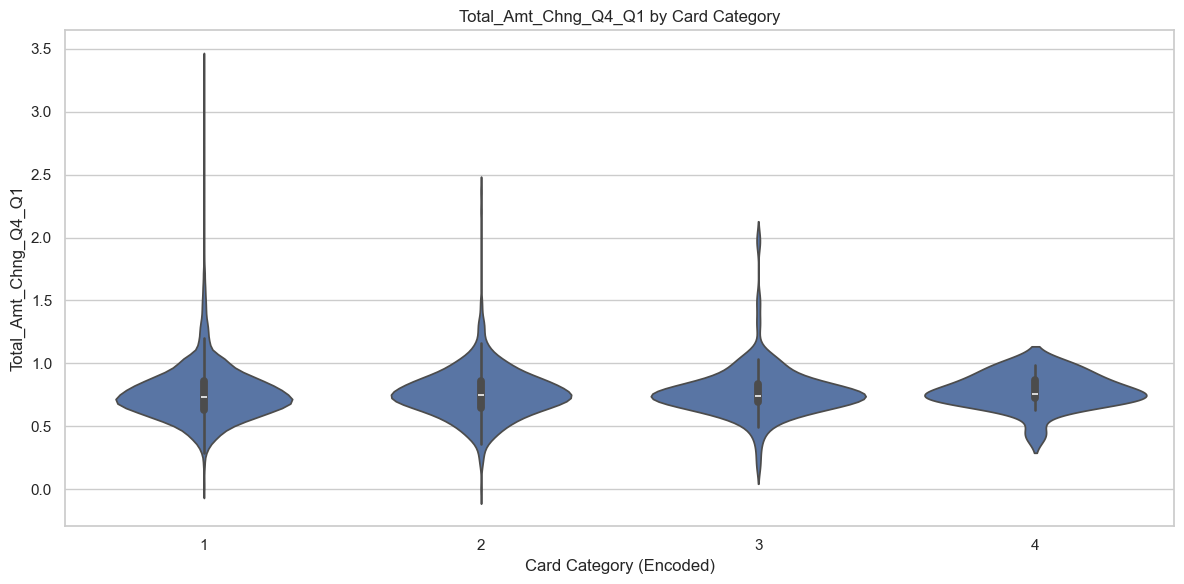

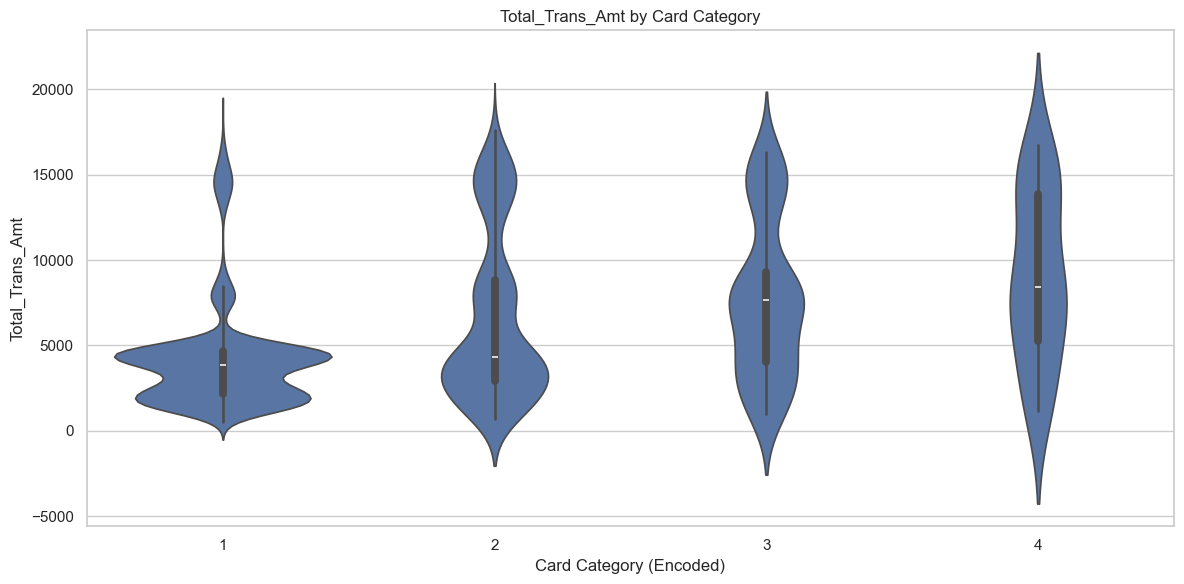

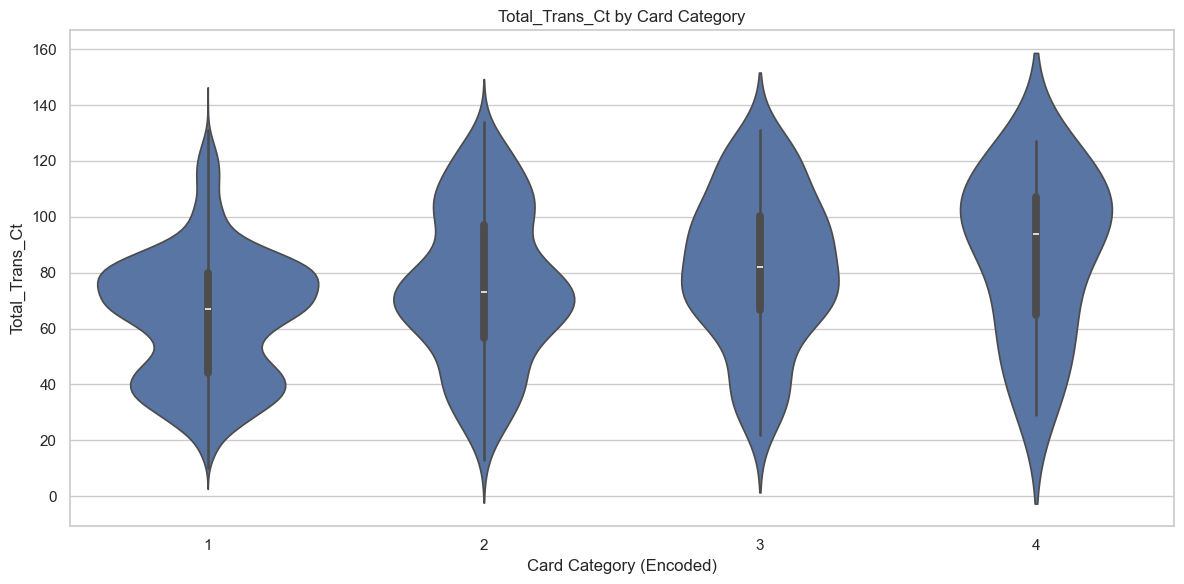

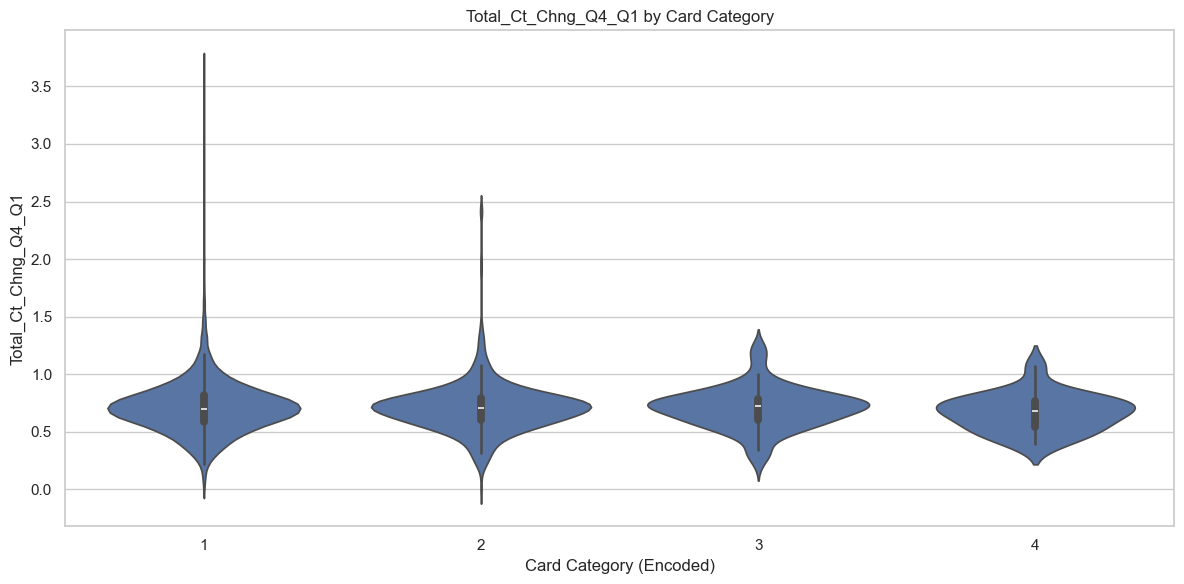

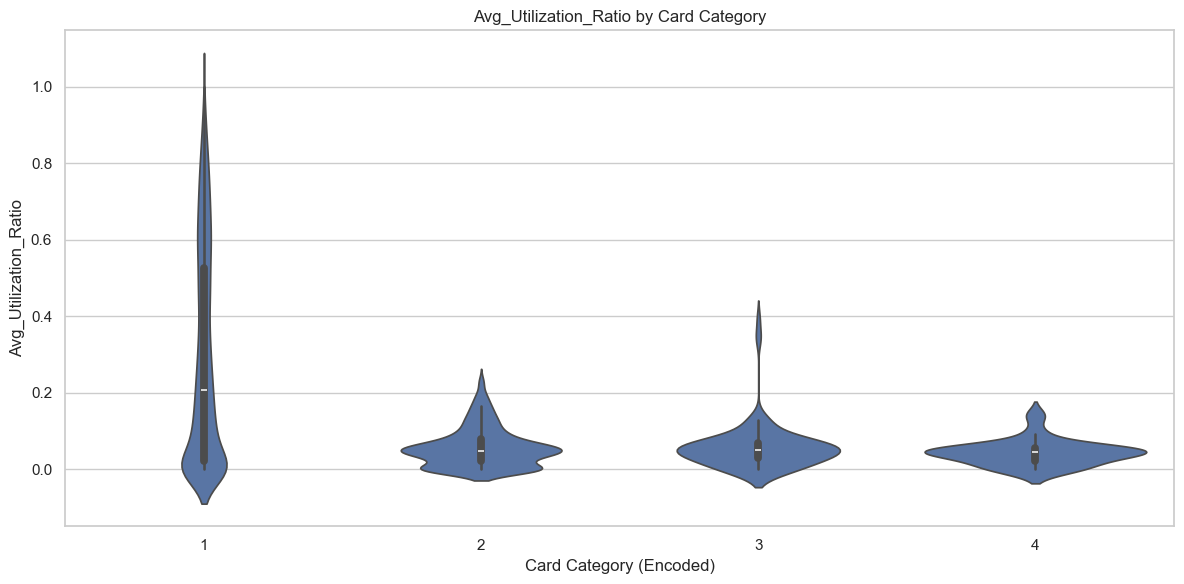

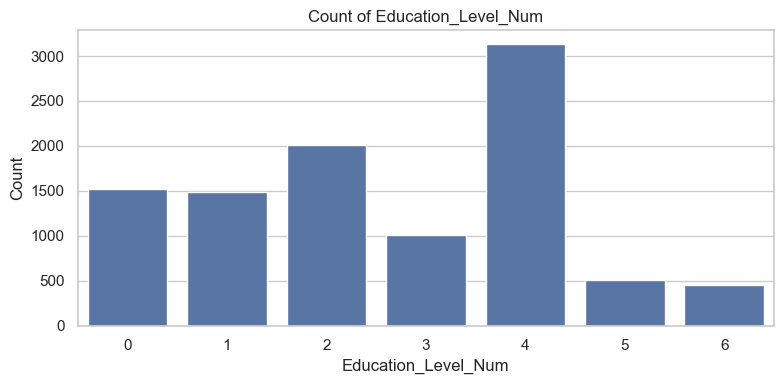

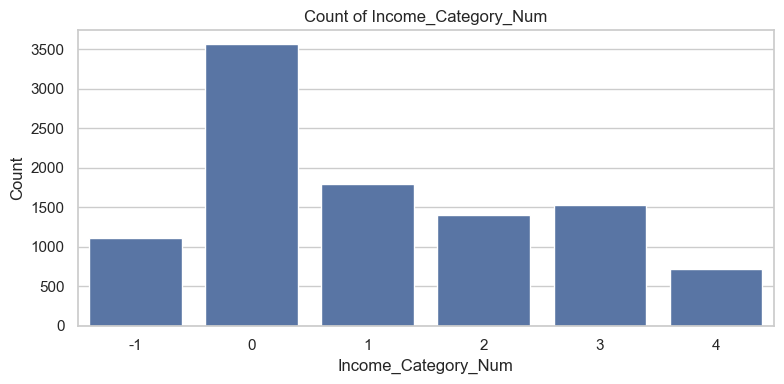

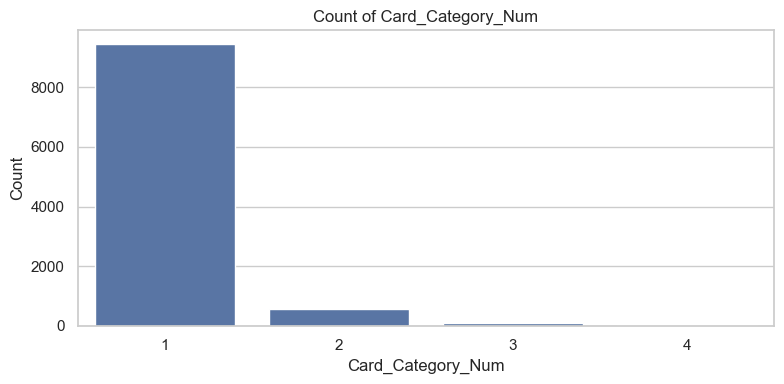

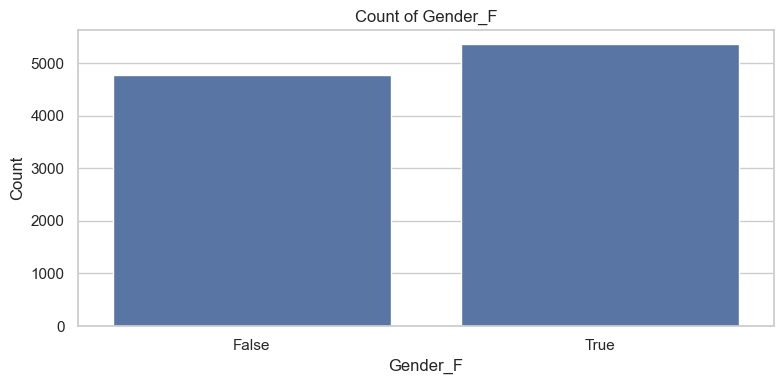

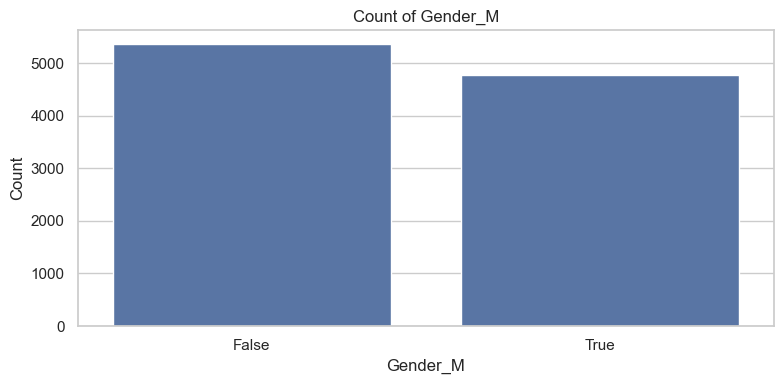

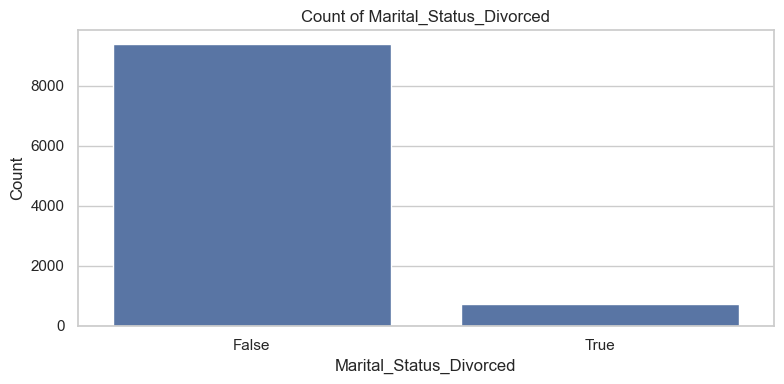

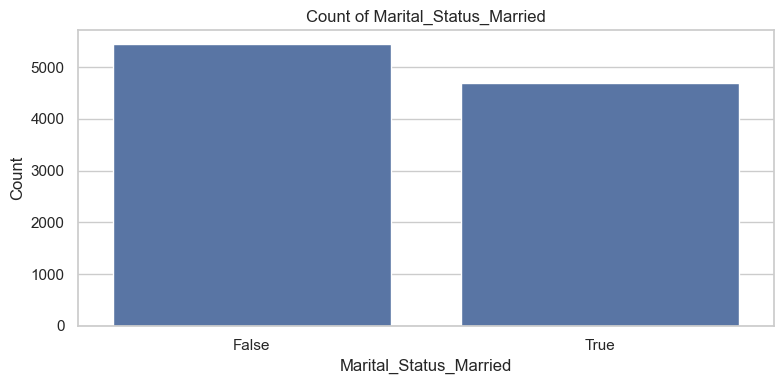

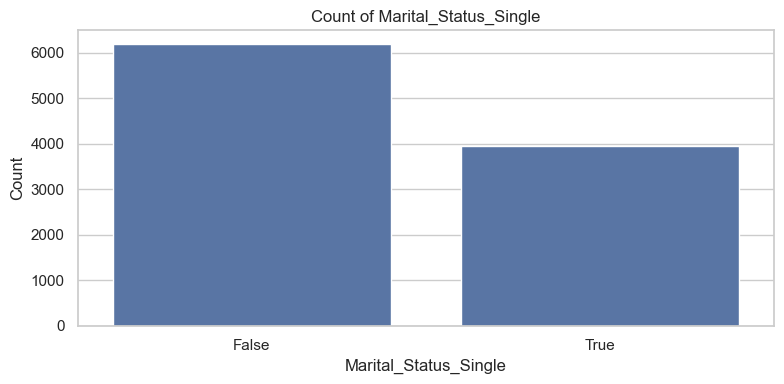

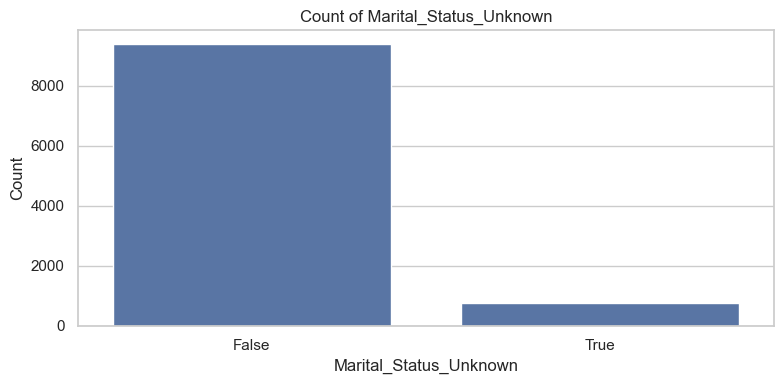

In [6]:
# Exploratory Data Analysis on Credit Card Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual theme
sns.set(style='whitegrid')

# Create directory to save plots (ensure it exists)
os.makedirs("eda_charts2", exist_ok=True)


# Assuming df is already loaded
# Key Numerical Features to Explore
num_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Plot distribution for each numerical feature
for col in num_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"eda_charts2/distribution_{col}.png")
    plt.show()

# Boxplots by Income Category
for col in num_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Income_Category_Num', y=col, data=df)
    plt.title(f"{col} by Income Category")
    plt.xlabel("Income Category (Encoded)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"eda_charts2/boxplot_income_{col}.png")
    plt.show()

# Violin plots by Card Category
for col in num_features:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Card_Category_Num', y=col, data=df)
    plt.title(f"{col} by Card Category")
    plt.xlabel("Card Category (Encoded)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"eda_charts2/violin_card_{col}.png")
    plt.show()

# Key Categorical Encoded Features
cat_features = [
    'Education_Level_Num', 'Income_Category_Num', 'Card_Category_Num',
    'Gender_F', 'Gender_M', 'Marital_Status_Divorced',
    'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown'
]

# Bar plots for encoded categorical features
for col in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(f"eda_charts2/countplot_{col}.png")
    plt.show()

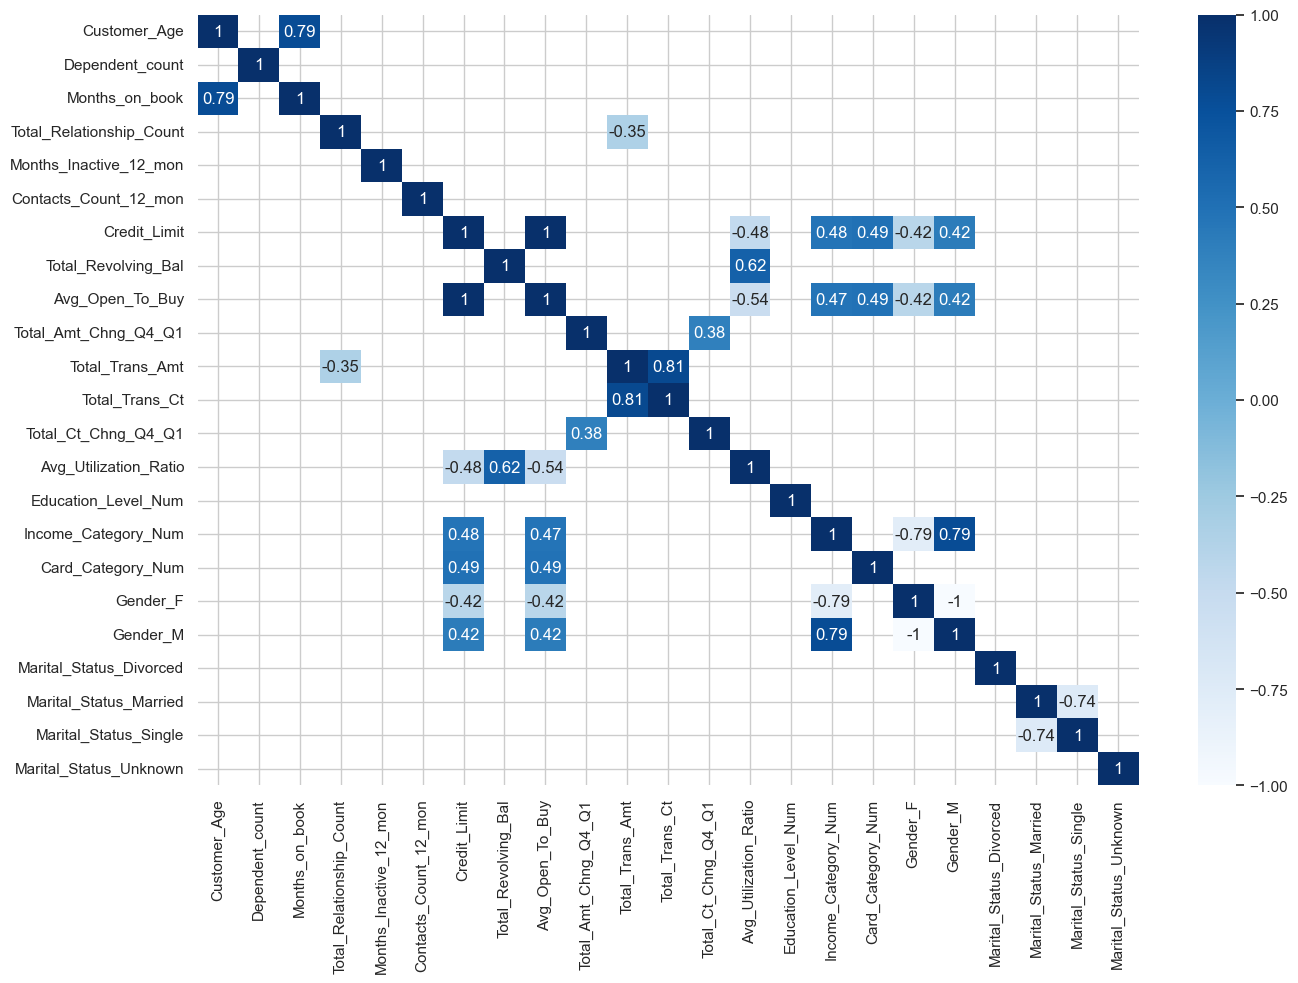

In [7]:
correlations= df.corr(numeric_only=True)
fig, ax= plt.subplots(figsize=(14,10))
sns.heatmap(correlations[(correlations>0.30) | (correlations<-0.30)], cmap='Blues', annot=True, ax=ax)
plt.tight_layout()
plt.savefig("Correlation_CreditCard_2.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
df['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['Income_Category', 'Card_Category', 'Education_Level'], axis=1)
scaler= StandardScaler()
scaler.fit(X)
X_scaled= scaler.transform(X)
X_scaled

array([[-0.16540558,  0.50336813,  0.38462088, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038,  2.04319867,  1.01071482, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  0.50336813,  0.00896451, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -1.03646242,  0.00896451, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544, -0.26654715,  0.00896451, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.26654715, -1.36844216, ...,  1.07733799,
        -0.79850685, -0.28260887]], shape=(10127, 23))

Inertias: [232921.00000000006, 201995.46112480757, 187748.95440850445, 179828.28257377385, 171857.62735532914, 166027.0225056882, 159557.06128196837, 156747.2116985019, 153667.658553038, 149614.47226989435]
Length: 10


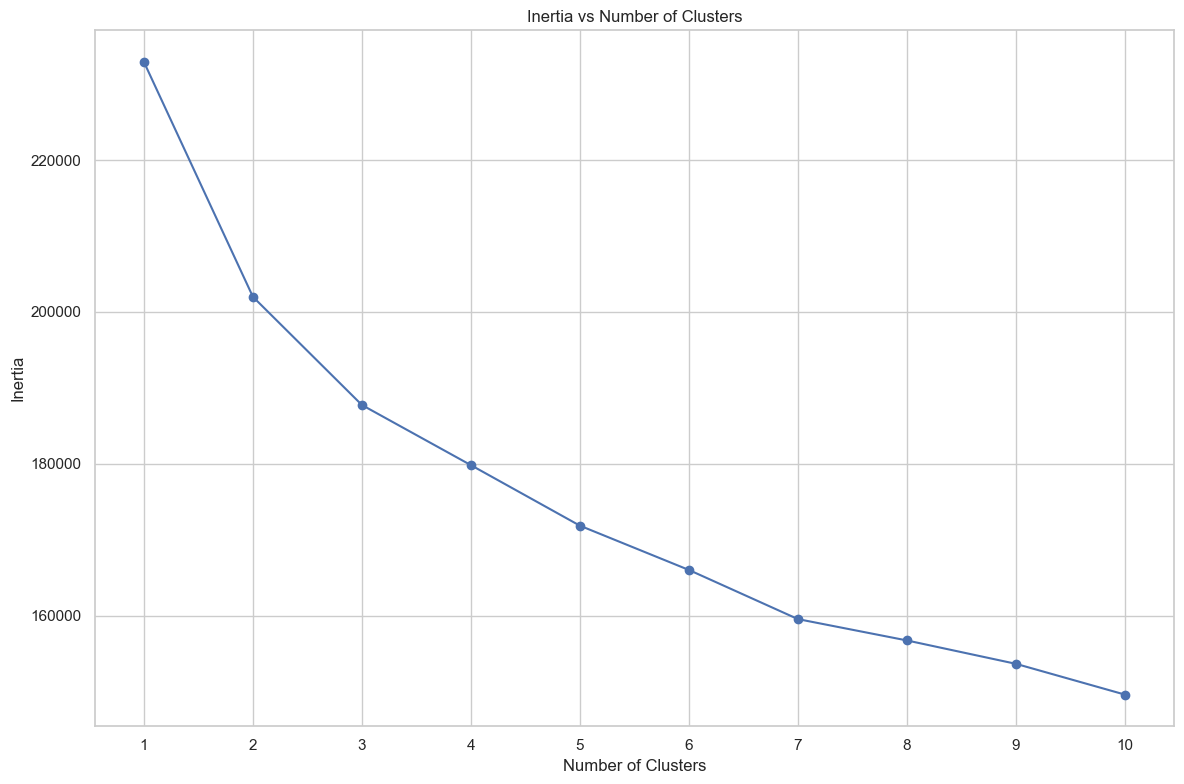

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Assuming X_scaled is already defined and cleaned
X = pd.DataFrame(X_scaled)
inertias = []

# Loop to compute inertia for k=1 to 10
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    #model.fit(X)
    y=model.fit_predict(X)
    inertias.append(model.inertia_)

# Debug print
print("Inertias:", inertias)
print("Length:", len(inertias))

# Plot the elbow curve
plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1,11))
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.savefig("inertia_elbow_creditcard3.png", dpi=300, bbox_inches='tight')
plt.show()


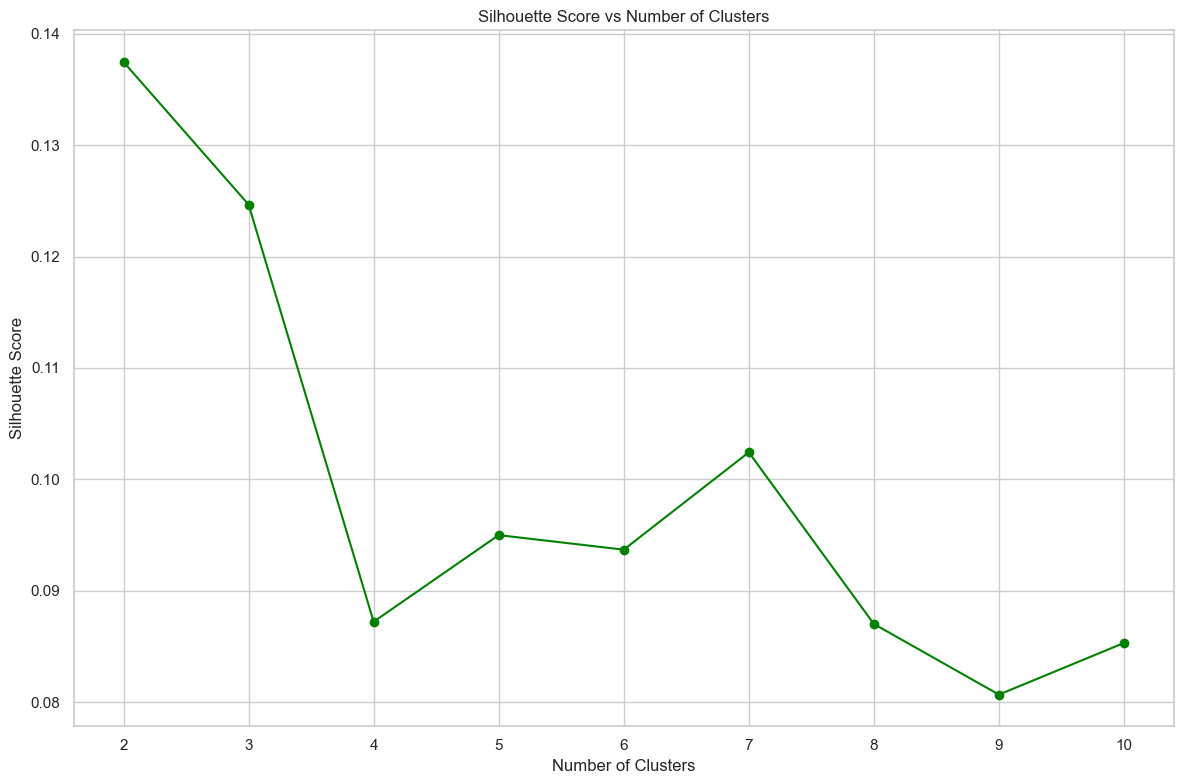

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_scaled is your cleaned and scaled data
X = pd.DataFrame(X_scaled)

silhouette_scores = []

# Try different cluster counts
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.savefig("silhouette_score_creditcard.png", dpi=300, bbox_inches='tight')
plt.show()


Original Features: 23, Reduced Features: 5


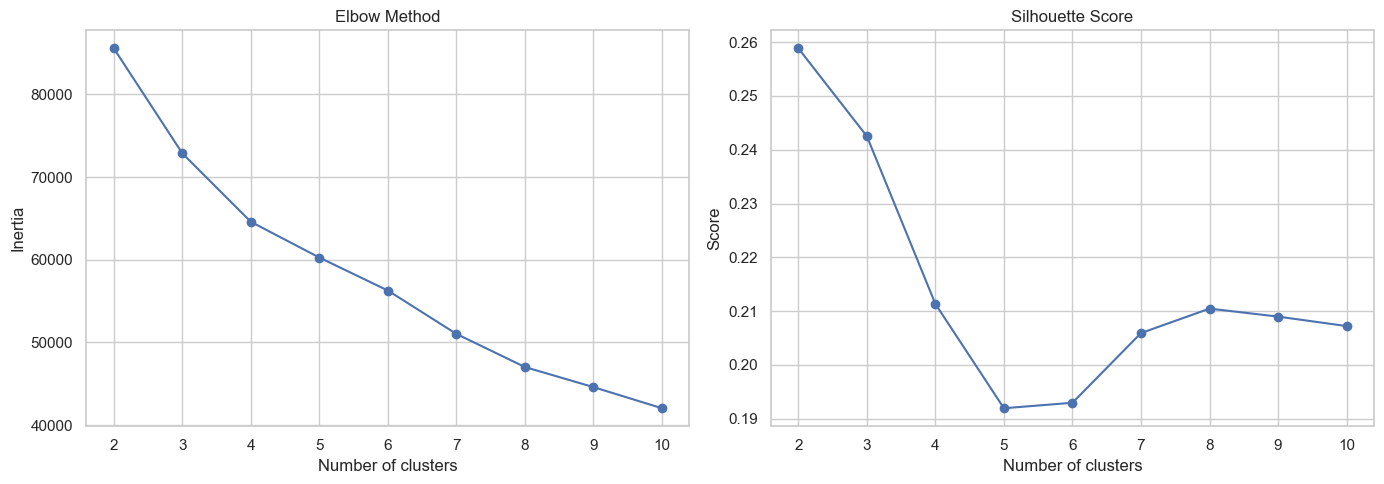


Cluster Summary:
         Customer_Age  Dependent_count  Months_on_book  \
Cluster                                                  
0           46.507906         2.335133       35.996722   
1           45.924084         2.513089       35.784686   
2           46.229417         2.288309       35.888954   

         Total_Relationship_Count  Months_Inactive_12_mon  \
Cluster                                                     
0                        3.841689                2.356730   
1                        2.948953                2.297775   
2                        4.154996                2.336947   

         Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
Cluster                                                             
0                     2.414963   4384.490976          1137.038373   
1                     2.358639  23914.264398          1148.994764   
2                     2.559918   8244.016672          1208.166715   

         Avg_Open_To_Buy  Total_Amt_Chn

In [12]:
# K-Means Clustering Preparation and PCA
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the cleaned dataset
df = pd.read_csv("CC_CustomerSeg_Model1.csv")

# --- Feature Selection for Clustering ---
# Include all numerical columns and one-hot encoded Marital_Status, Gender
df_clust = df[[
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Education_Level_Num', 'Income_Category_Num', 'Card_Category_Num',
    'Gender_F', 'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married',
    'Marital_Status_Single', 'Marital_Status_Unknown']]

# --- Standardize the Data ---
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clust)

# --- PCA Explanation ---
# PCA (Principal Component Analysis) reduces dimensionality by projecting data onto components
# that capture the most variance. It helps to:
# - Improve clustering performance by removing multicollinearity
# - Speed up clustering algorithms
# - Make cluster visualization easier

# Apply PCA to reduce dimensions while retaining 95% of the variance
pca = PCA(n_components=5, random_state=42)  #earlier n_components set at 0.95, now testing at 5
df_pca = pca.fit_transform(df_scaled)

print(f"Original Features: {df_clust.shape[1]}, Reduced Features: {df_pca.shape[1]}")

# --- Optimal Clusters using Elbow and Silhouette ---
inertia = []
sil_scores = []
k_range = range(2, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42) #using n_clusters=3 instead of k
    model.fit(df_pca)
    inertia.append(model.inertia_)
    sil_scores.append(silhouette_score(df_pca, model.labels_))

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.savefig("CreditCard_ClusteringK_Test3.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Final KMeans Model ---
optimal_k = 3  # Based on elbow/silhouette results — adjust if needed
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(df_pca)
df['Cluster'] = kmeans.labels_ 




# --- Cluster Summary ---
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\nCluster Summary:")
print(cluster_summary)
print(df['Cluster'].value_counts())

Persona
The Modern Financial Woman        5186
The Practical Middle_Class Man    3413
The Business Elite                1528
Name: count, dtype: int64


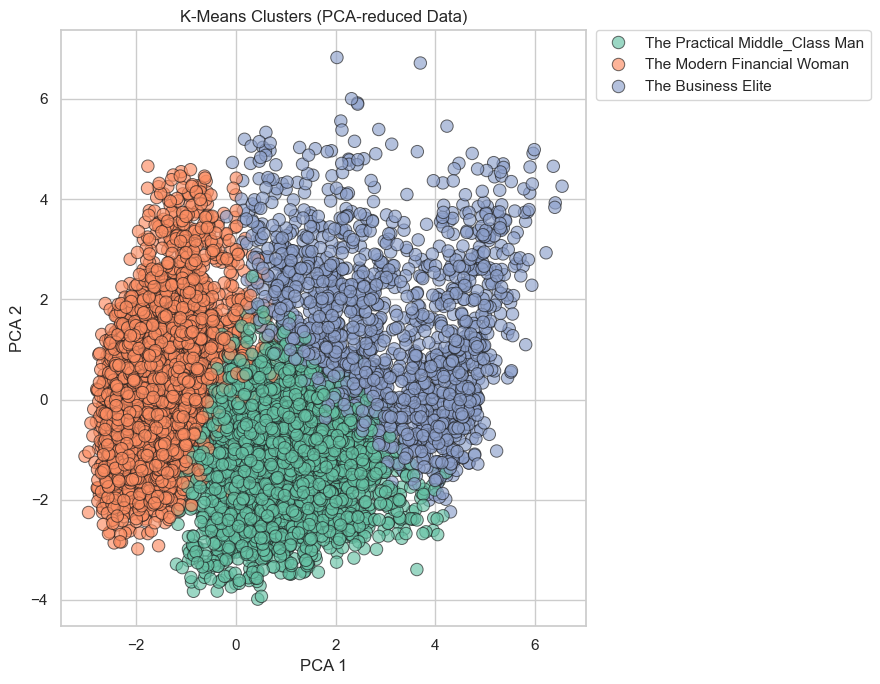

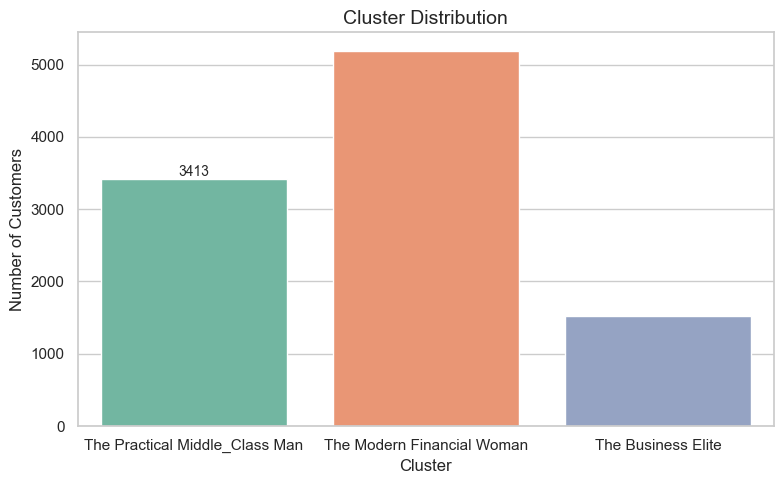

In [13]:
final_persona_mapping = {
    0: 'The Modern Financial Woman',
    1: 'The Business Elite',
    2: 'The Practical Middle_Class Man'
}
df['Persona'] = df['Cluster'].map(final_persona_mapping)
print(df['Persona'].value_counts())

# --- Visualize Clusters (First 2 PCA Components) ---
plt.figure(figsize=(9, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Persona'], palette='Set2',
               s=80, edgecolor='k', alpha=0.65 # larger, outlined, some transparency
)
plt.title('K-Means Clusters (PCA-reduced Data)')
plt.xlabel('PCA 1', fontsize=12)
plt.ylabel('PCA 2', fontsize=12)
plt.legend(loc='best', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.tight_layout()
plt.savefig("CreditCard_PCA_reduceddata_Test3.png", dpi=300, bbox_inches='tight')
plt.show()

# --- Cluster Distribution ---
os.makedirs("outputs/cluster_reports_model1", exist_ok=True)


plt.figure(figsize=(8, 5))
ax=sns.countplot(data=df, x='Persona', hue='Persona', palette='Set2', legend=False)
plt.title('Cluster Distribution', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()
plt.savefig("outputs/cluster_reports_model1/Cluster_Distribution_Model1.png", dpi=300, bbox_inches='tight')
plt.show()



In [14]:
model=KMeans(n_clusters=3)
y=model.fit_predict(X_scaled)
y
df['Cluster']= y
df
df.to_csv("CreditCard_Analysis_Test3.csv", index=False)


Confusion Matrix:
 [[1042    2    0]
 [   2  265    7]
 [   0    5  703]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       0.97      0.97      0.97       274
           2       0.99      0.99      0.99       708

    accuracy                           0.99      2026
   macro avg       0.99      0.99      0.99      2026
weighted avg       0.99      0.99      0.99      2026


Feature Importance:

Gender_F                                  0.188460
Gender_M                                  0.179651
Persona_The Modern Financial Woman        0.143379
Persona_The Practical Middle_Class Man    0.114684
Credit_Limit                              0.092705
Avg_Open_To_Buy                           0.085019
Income_Category_Num                       0.037802
Income_Category_Less than $40K            0.032032
Card_Category_Num                         0.022470
Avg_Utilization_Ratio                  

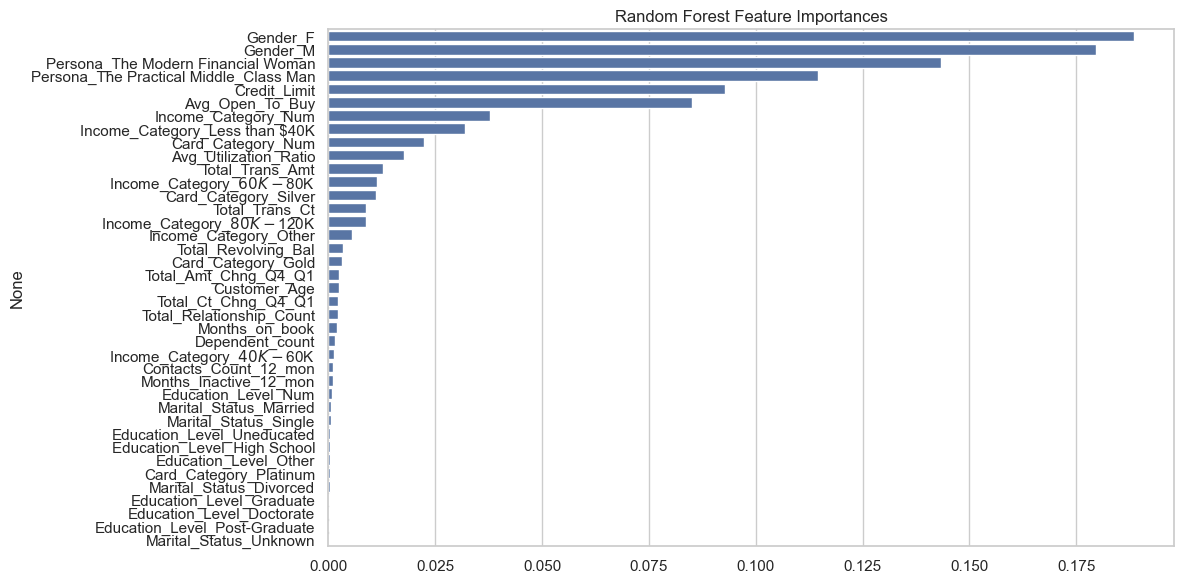

In [15]:
# Random Forest Classification using all necessary features including marital status

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the final processed DataFrame (update path as needed)
df = pd.read_csv("CreditCard_Analysis_Test3.csv")  # Replace with actual filename

# Replace or encode 'Unknown' in categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    if df[col].isin(['Unknown']).any():
        df[col] = df[col].replace('Unknown', 'Other')

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Validate 'Cluster' column
if 'Cluster' not in df.columns:
    print("Available columns:", df.columns.tolist())
    raise ValueError("The dataframe must include a 'Cluster' column to proceed with classification.")

# Drop identifier columns and isolate feature columns
id_cols = ['CLIENTNUM'] if 'CLIENTNUM' in df.columns else []
excluded_cols = id_cols + ['Cluster']

feature_columns = [col for col in df.columns if col not in excluded_cols]

# Split into features and target
X = df[feature_columns]
y = df['Cluster']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:\n")
print(importances)

# Plot top features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.savefig("Random_Forest_FeatureIMP_Test3.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
import os

# Save directory
os.makedirs("outputs/cluster_reports_model1", exist_ok=True)
df
# Apply correct mapping



numeric_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book',
    'Total_Relationship_Count', 'Months_Inactive_12_mon',
    'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
    'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
    'Education_Level_Num', 'Income_Category_Num', 'Card_Category_Num',
    'Gender_F', 'Gender_M', 'Marital_Status_Divorced', 'Marital_Status_Married',
    'Marital_Status_Single', 'Marital_Status_Unknown']

# Fill missing values to avoid NaN in output
df_filled = df.copy()
df_filled[numeric_features] = df_filled[numeric_features].fillna(0)

# Group and summarize
persona_summary = df_filled.groupby('Cluster')[numeric_features].mean().reset_index()
persona_summary['Persona'] = persona_summary['Cluster'].map(final_persona_mapping)
# Map persona names
#persona_mapping=(123)
persona_summary.to_csv("outputs/cluster_reports_model1/persona_summary_model1.csv", index= False)
persona_summary.to_excel("outputs/cluster_reports_model1/persona_summary_model1.xlsx", index= False)
persona_summary

,Cluster,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Num,Income_Category_Num,Card_Category_Num,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Persona
0,0,46.511256,2.332307,36.016163,3.833558,2.355975,2.413123,4420.998307,1138.920916,3282.077391,...,2.610737,-0.002694,1.020974,1.000000,0.000000,0.075043,0.462575,0.391957,0.070425,The Modern Financial Woman
1,1,46.236364,2.574545,35.948364,3.336000,2.310545,2.444364,27621.817455,1168.760000,26453.057455,...,2.591273,2.538909,1.534545,0.117091,0.882909,0.089455,0.373091,0.448727,0.088727,The Business Elite
2,2,46.089733,2.278200,35.792405,3.966245,2.331364,2.521238,7443.000816,1195.443319,6247.557496,...,2.593249,2.114768,1.000844,0.000000,1.000000,0.066104,0.497890,0.362588,0.073418,The Practical Middle_Class Man


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Save directories
os.makedirs("outputs/cluster_reports_model1", exist_ok=True)
os.makedirs("outputs/cluster_reports", exist_ok=True)

df = pd.read_csv("CreditCard_Analysis_Test3.csv")
original_df
clientnum_df = original_df[['CLIENTNUM']]

# Create PCA column names (adjust the number if you use more/less components)
n_pca = df_pca.shape[1]
pca_colnames = [f'PCA_{i+1}' for i in range(n_pca)]
# Convert PCA array to DataFrame with proper column names
df_pca_df = pd.DataFrame(df_pca, columns=pca_colnames, index=df.index)
df_clust_main= df[['Cluster', 'Persona']+ numeric_features]


# Export Clustered Customer Data including CLIENTNUM (merged from original_df)
df_clustered = pd.concat([clientnum_df, df_clust_main, df_pca_df], axis=1)
df_clustered.to_csv("outputs/cluster_reports/Clustered_Customer_Data_Model1_PCA1.csv", index=False)
df_clustered.to_excel("outputs/cluster_reports/Clustered_Customer_Data_Model1_PCA1.xlsx", index=False)
display(persona_summary)

,Cluster,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Education_Level_Num,Income_Category_Num,Card_Category_Num,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Persona
0,0,46.511256,2.332307,36.016163,3.833558,2.355975,2.413123,4420.998307,1138.920916,3282.077391,...,2.610737,-0.002694,1.020974,1.000000,0.000000,0.075043,0.462575,0.391957,0.070425,The Modern Financial Woman
1,1,46.236364,2.574545,35.948364,3.336000,2.310545,2.444364,27621.817455,1168.760000,26453.057455,...,2.591273,2.538909,1.534545,0.117091,0.882909,0.089455,0.373091,0.448727,0.088727,The Business Elite
2,2,46.089733,2.278200,35.792405,3.966245,2.331364,2.521238,7443.000816,1195.443319,6247.557496,...,2.593249,2.114768,1.000844,0.000000,1.000000,0.066104,0.497890,0.362588,0.073418,The Practical Middle_Class Man


In [18]:
import joblib

# Save your trained model (example: RandomForestClassifier)
joblib.dump(model, 'CREDITCARD_ANALYSIS_MODEL1.pkl')

print("\u2705 Model saved as 'CREDITCARD_ANALYSIS_MODEL1.pkl'")

✅ Model saved as 'CREDITCARD_ANALYSIS_MODEL1.pkl'
